#**Problem Statement and Analyzing basic metrics**
The Management team at Walmart Inc. wants to analyze the customer purchase 
behavior (specifically, purchase amount) against the customer’s gender and the 
various other factors to help the business make better decisions.


In [76]:
# downloading data to working directory
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2023-03-20 19:40:32--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.153.17, 13.35.153.45, 13.35.153.13, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.153.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094.1’

walmart_data.csv?16 100%[===================>]  21.96M  97.2MB/s    in 0.2s    

2023-03-20 19:40:33 (97.2 MB/s) - ‘walmart_data.csv?1641285094.1’ saved [23027994/23027994]



In [77]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import binom
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF  # empirical CDF\n",
from scipy.stats import norm,poisson,expon ## norm --> 'Normal' or \"Gaussian' "

In [78]:
# assigning data to object
df=pd.read_csv("/content/walmart_data.csv?1641285094")

In [79]:
#Exploring first five rows of data set
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [80]:
#Exploring last five rows of data set
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [81]:
# Length of dataset
len(df)

550068

##**shape of data, data types of all the attributes**

In [82]:
# Checking dataset shape
df.shape

(550068, 10)

In [83]:
# Checking dataset datatypes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [84]:
# information about the data 
# column names, datatypes, non-null values, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### **Observations:**
* Walmart Business Case Study dataset having 550068 rows and 10 columns.

* In this dataset, User ID column having unique Id for corresponding to every user and similarly for every product there is a unique Product ID in Product ID column. Gender, Age, Occupation City Category, Stay In Current City Years, Marital Status and Product Category are Categorical Variable where Purchase is continuous variable.
 
* Categorical Variable Age, Occupation and Stay In Current City Years are belongs to ordinal.

##**Non-Graphical Analysis: Value counts and unique attributes**

In [85]:
# Checking number of nunique values in our dataset
for i in df.columns:
  print(i,":",df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [86]:
# Checking number of unique values in our dataset
for i in df.columns:
  print(i,":",df[i].unique())

User_ID : [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender : ['F' 'M']
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category : ['A' 'C' 'B']
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']
Marital_Status : [0 1]
Product_Category : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Purchase : [ 8370 15200  1422 ...   135   123   613]


In [87]:
# checking value counts
df["User_ID"].value_counts().to_frame().T

,1001680,1004277,1001941,1001181,1000889,1003618,1001150,1001015,1005795,1005831,...,1003291,1002135,1005391,1000094,1005608,1002690,1002111,1005810,1004991,1000708
User_ID,1026,979,898,862,823,767,752,740,729,727,...,8,8,7,7,7,7,7,7,7,6


In [88]:
# checking value counts
df["Product_ID"].value_counts().to_frame().T

,P00265242,P00025442,P00110742,P00112142,P00057642,P00184942,P00046742,P00058042,P00059442,P00145042,...,P00051742,P00091542,P00224642,P00238842,P00070142,P00314842,P00298842,P00231642,P00204442,P00066342
Product_ID,1880,1615,1612,1562,1470,1440,1438,1422,1406,1406,...,1,1,1,1,1,1,1,1,1,1


In [89]:
# checking value counts
df["Gender"].value_counts().to_frame()

,Gender
M,414259
F,135809


In [90]:
# checking value counts
df["Age"].value_counts().to_frame().T

,26-35,36-45,18-25,46-50,51-55,55+,0-17
Age,219587,110013,99660,45701,38501,21504,15102


In [91]:
# checking value counts
df["Occupation"].value_counts().to_frame().T

,4,0,7,1,17,20,12,14,2,16,...,3,10,5,15,11,19,13,18,9,8
Occupation,72308,69638,59133,47426,40043,33562,31179,27309,26588,25371,...,17650,12930,12177,12165,11586,8461,7728,6622,6291,1546


In [92]:
# checking value counts
df["City_Category"].value_counts().to_frame()

,City_Category
B,231173
C,171175
A,147720


In [93]:
# checking value counts
df["Stay_In_Current_City_Years"].value_counts().to_frame().T

,1,2,3,4+,0
Stay_In_Current_City_Years,193821,101838,95285,84726,74398


In [94]:
# checking value counts
df["Marital_Status"].value_counts().to_frame()

,Marital_Status
0,324731
1,225337


In [95]:
# checking value counts
df["Product_Category"].value_counts().to_frame().T

,5,1,8,11,2,6,3,4,16,15,13,10,12,7,18,20,19,14,17,9
Product_Category,150933,140378,113925,24287,23864,20466,20213,11753,9828,6290,5549,5125,3947,3721,3125,2550,1603,1523,578,410


In [96]:
# checking value counts
df["Purchase"].value_counts().to_frame().T

,7011,7193,6855,6891,7012,6960,6879,7166,7027,6868,...,11169,23851,11168,14376,4918,23491,18345,3372,855,21489
Purchase,191,188,187,184,183,183,182,182,182,180,...,1,1,1,1,1,1,1,1,1,1


##**Statistical Summary**


In [97]:
# statistical summary
df.describe(include="int")

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [98]:
# statistical summary
df.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


### **Observations:**
* The total number of unique users are 5891 and unique products are 3631.
* Age is classified in 7 bins.
* No Null values are present in the Data set and Neither duplicate row has been found.
* Cities are categorized in three i.e. A, B and C.
* Stay In Current City Years is classified in 5 bins to understand about the duration people living in that city.
* Product with Product ID 550068 having highest purchase frequency.
* Lowest purchase amount  is 12 dollar and highest is 23961 dollars.
* Mean of purchase amount is approximately 9264 dollars and most of user purchase amount is below 12054 dollars.


##**Missing Value**

In [99]:
# null values analysis
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

##**Visual Analysis - Univariate**

In [100]:
# Non-Garaphical univariate analysis with user id
df_age_uid=df.groupby(["Age"])["User_ID"].nunique()
df_age_uid.to_frame().T

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
User_ID,218,1069,2053,1167,531,481,372


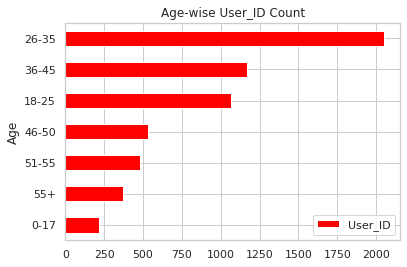

In [101]:
# Visual Analysis - Univariate
df_age_uid=df.groupby(["Age"])["User_ID"].nunique().reset_index()
df_age_uid.sort_values(["User_ID"],ascending=True).plot(kind='barh', y='User_ID', x='Age',color={"red"},title="Age-wise User_ID Count")
plt.show()

In [102]:
# Non-Garaphical univariate analysis with user id
df_gender_uid=df.groupby(["Gender"])["User_ID"].nunique()
df_gender_uid.to_frame()

,User_ID
Gender,
F,1666
M,4225


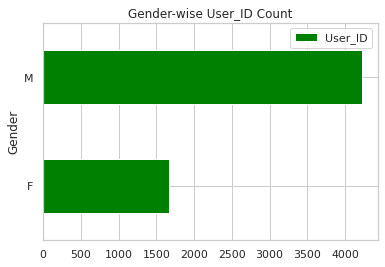

In [103]:
# Visual Analysis - Univariate
df_age_uid=df.groupby(["Gender"])["User_ID"].nunique().reset_index()
df_age_uid.sort_values(["User_ID"],ascending=True).plot(kind='barh', y='User_ID', x='Gender',color={"green"},title="Gender-wise User_ID Count")
plt.show()

In [104]:
# Non-Garaphical univariate analysis with user id
df_occu_uid=df.groupby(df["Occupation"])["User_ID"].nunique()
df_occu_uid.to_frame().T

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
User_ID,688,517,256,170,740,111,228,669,17,88,...,128,376,140,294,140,235,491,67,71,273


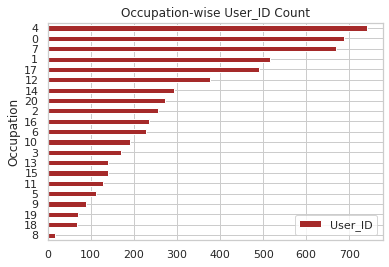

In [105]:
# Visual Analysis - Univariate
df_age_uid=df.groupby(["Occupation"])["User_ID"].nunique().reset_index()
df_age_uid.sort_values(["User_ID"],ascending=True).plot(kind='barh', y='User_ID', color="Brown", x='Occupation',title="Occupation-wise User_ID Count")
plt.show()

In [106]:
# Non-Garaphical univariate analysis with user id
df_city_cat_uid=df.groupby(df["City_Category"])["User_ID"].nunique()
df_city_cat_uid.to_frame()

,User_ID
City_Category,
A,1045
B,1707
C,3139


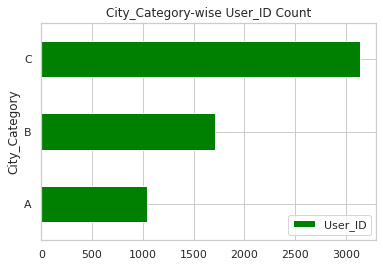

In [107]:
# Visual Analysis - Univariate
df_city_cat_uid=df.groupby(["City_Category"])["User_ID"].nunique().reset_index()
df_city_cat_uid.sort_values(["User_ID"],ascending=True).plot(kind='barh', y='User_ID', x='City_Category',color={"green"},title="City_Category-wise User_ID Count")
plt.show()

In [108]:
# Non-Garaphical univariate analysis with user id
df_Stay_In_Current_City_Years=df.groupby(df["Stay_In_Current_City_Years"])["User_ID"].nunique()
df_Stay_In_Current_City_Years.to_frame().T

Stay_In_Current_City_Years,0,1,2,3,4+
User_ID,772,2086,1145,979,909


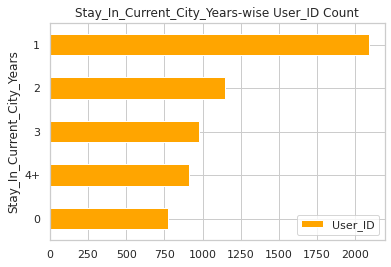

In [109]:
# Visual Analysis - Univariate
df_Stay_In_Current_City_Years=df.groupby(["Stay_In_Current_City_Years"])["User_ID"].nunique().reset_index()
df_Stay_In_Current_City_Years.sort_values(["User_ID"],ascending=True).plot(kind='barh', y='User_ID', x='Stay_In_Current_City_Years',color={"orange"},title="Stay_In_Current_City_Years-wise User_ID Count")
plt.show()

In [110]:
# Non-Garaphical univariate analysis with user id
df_Marital_Status=df.groupby(df["Marital_Status"])["User_ID"].nunique()
df_Marital_Status.to_frame()

,User_ID
Marital_Status,
0,3417
1,2474


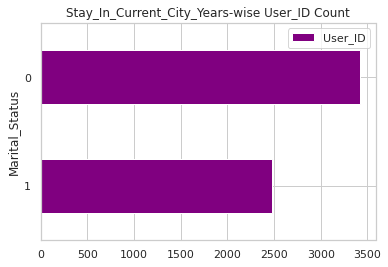

In [111]:
# Visual Analysis - Univariate
df_Marital_Status=df.groupby(["Marital_Status"])["User_ID"].nunique().reset_index()
df_Marital_Status.sort_values(["User_ID"],ascending=True).plot(kind='barh', y='User_ID', x='Marital_Status',color={"Purple"},title="Stay_In_Current_City_Years-wise User_ID Count")
plt.show()

In [112]:
# Non-Garaphical univariate analysis with user id
df_Product_Category=df.groupby(df["Product_Category"])["Product_ID"].nunique()
df_Product_Category.to_frame().T

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Product_ID,493,152,90,88,967,119,102,1047,2,25,254,25,35,44,44,98,11,30,2,3


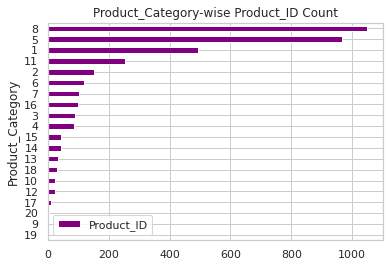

In [113]:
# Visual Analysis - Univariate
df_Product_Category=df.groupby(["Product_Category"])["Product_ID"].nunique().reset_index()
df_Product_Category.sort_values(["Product_ID"],ascending=True).plot(kind='barh', y='Product_ID', x='Product_Category',color={"Purple"},title="Product_Category-wise Product_ID Count")
plt.show()

In [114]:
df_unique=df[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status',
       'Purchase']].groupby(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years','Marital_Status'])['Purchase'].sum().reset_index()
df_unique

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4+,1,4116058
5887,1006037,F,46-50,1,C,4+,0,1119538
5888,1006038,F,55+,1,C,2,0,90034
5889,1006039,F,46-50,0,B,4+,1,590319


In [115]:
df_unique_pro=df[['User_ID','Product_Category', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status',
       'Purchase']].groupby(['User_ID','Product_Category', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years','Marital_Status'])['Purchase'].sum().reset_index()
df_unique_pro

,User_ID,Product_Category,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,1,F,0-17,10,A,2,0,61604
1,1000001,2,F,0-17,10,A,2,0,12842
2,1000001,3,F,0-17,10,A,2,0,119859
3,1000001,4,F,0-17,10,A,2,0,5612
4,1000001,5,F,0-17,10,A,2,0,15749
...,...,...,...,...,...,...,...,...,...
56777,1006040,10,M,26-35,6,B,2,0,42287
56778,1006040,11,M,26-35,6,B,2,0,24832
56779,1006040,13,M,26-35,6,B,2,0,945
56780,1006040,15,M,26-35,6,B,2,0,79940


###**Analysis on the basis unique number users**

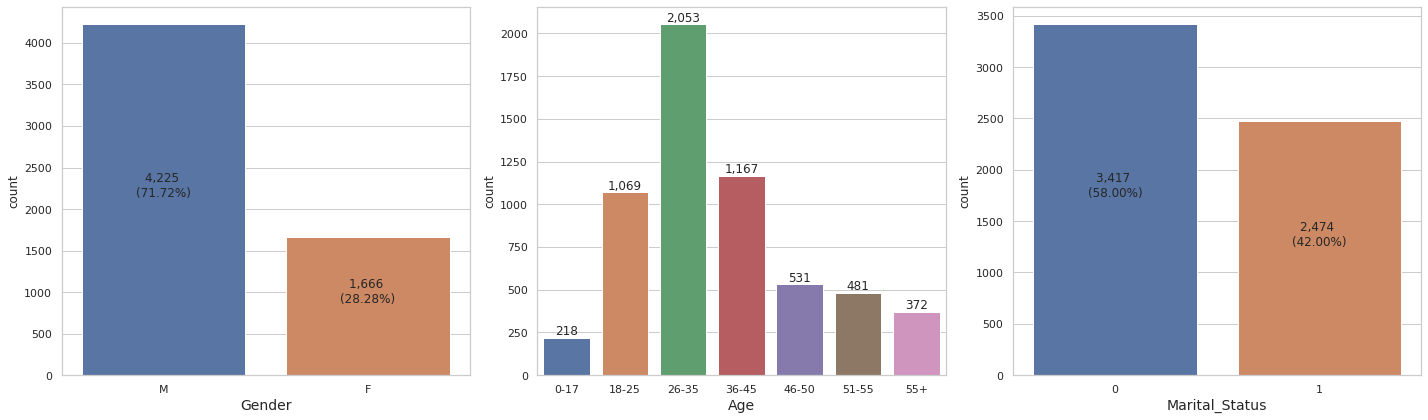

In [116]:

fig = plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
ax = sns.countplot(x = df_unique['Gender'],order = ['M','F'])
plt.xlabel('Gender',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/5891),
 (p.get_x() + p.get_width()/2, p.get_height()/2),
 ha = 'center', va = 'bottom')
plt.subplot(1, 3, 2)
ax=sns.countplot(x = df_unique['Age'],order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+'])
plt.xlabel('Age',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f}".format(p.get_height()),
 (p.get_x() + p.get_width()/2, p.get_height()),
 ha = 'center', va = 'bottom')
plt.subplot(1, 3, 3)
ax = sns.countplot(x = df_unique['Marital_Status'])
plt.xlabel('Marital_Status',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/5891),
 (p.get_x() + p.get_width()/2, p.get_height()/2),
 ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()

### **Observations:**
* Highley active user belongs to the Age bins of 26-35 years followed by Age bins of 36-45 and so on.
* 71.72% of total user are male rest of the female i.e., 28.28%.
* 58% of total users are unmarried and 42% are married.


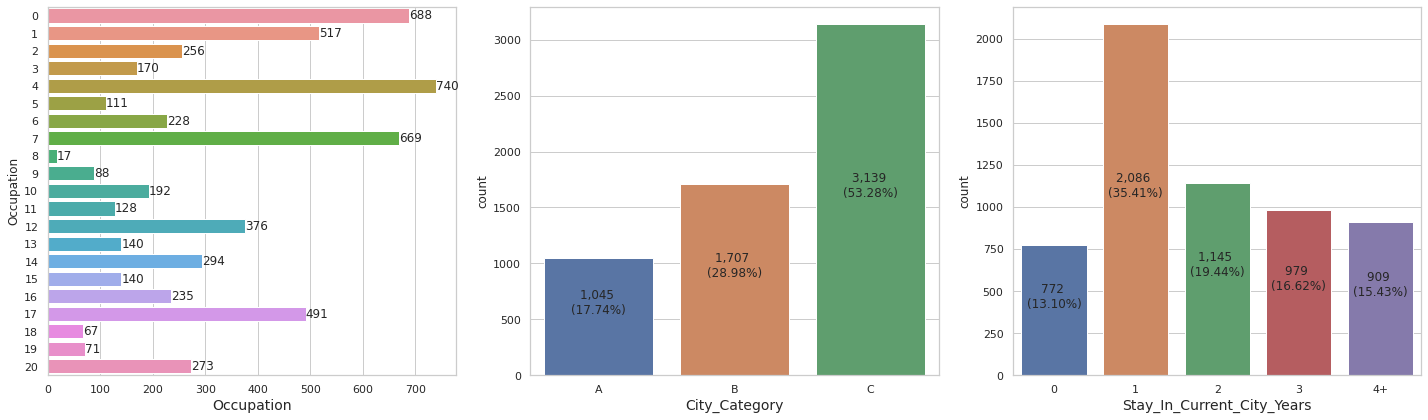

In [117]:
fig = plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
ax=sns.countplot(y = df_unique['Occupation'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Occupation',fontsize=14)
plt.subplot(1, 3, 2)
ax = sns.countplot(x = df_unique['City_Category'],order = ['A','B','C'])
plt.xlabel('City_Category',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/5891),
 (p.get_x() + p.get_width()/2, p.get_height()/2),ha = 'center', va = 'bottom')
plt.subplot(1, 3, 3)
ax = sns.countplot(x = df_unique['Stay_In_Current_City_Years'],order = ['0','1','2','3','4+'])
plt.xlabel('Stay_In_Current_City_Years',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/5891),
 (p.get_x() + p.get_width()/2, p.get_height()/2),ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()

### **Observations:**
* More than 50% of the Users belongs to these 5 occupations (4,0,7,1 and 17 ).
* More than 50% of the Users belongs to those cities which is under C Category.
* Around 49% of the Users are new to the cities as they are residing for less than of 1 years.


### **Analysis on the basis of amount of money spent in walmart**

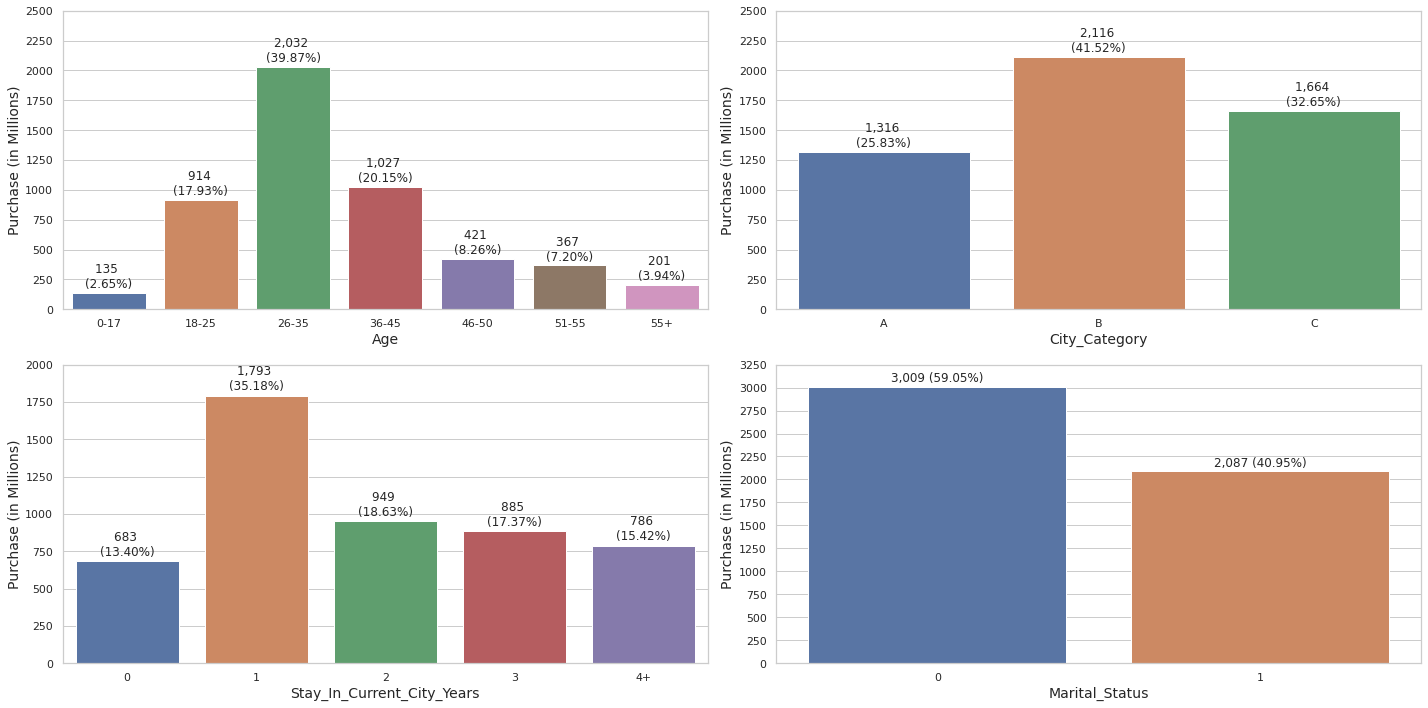

In [118]:
age = df_unique.groupby('Age')['Purchase'].sum().reset_index()
age['Purchase'] = age['Purchase']/1000000
city = df_unique.groupby('City_Category')['Purchase'].sum().reset_index()
city['Purchase'] = city['Purchase']/1000000
duration = df_unique.groupby('Stay_In_Current_City_Years')['Purchase'].sum().reset_index()
duration['Purchase'] = duration['Purchase']/1000000
marr = df_unique.groupby('Marital_Status')['Purchase'].sum().reset_index()
marr['Purchase']=marr['Purchase']/1000000

total_sum = (df_unique['Purchase'].sum())/1000000
fig = plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
ax = sns.barplot(data=age,x='Age',y='Purchase',orient='v')
plt.yticks(np.arange(0, 2501, 250))
plt.xlabel('Age',fontsize=14)
plt.ylabel('Purchase (in Millions)',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/total_sum),
 (p.get_x() + p.get_width()/2, p.get_height()+20),ha = 'center', va = 'bottom')
plt.subplot(2, 2, 2)
ax = sns.barplot(data=city,x='City_Category',y='Purchase',orient='v')
plt.yticks(np.arange(0, 2501, 250))
plt.xlabel('City_Category',fontsize=14)
plt.ylabel('Purchase (in Millions)',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/total_sum),
 (p.get_x() + p.get_width()/2, p.get_height()+20),ha = 'center', va = 'bottom')
plt.subplot(2, 2, 3)
ax = sns.barplot(data=duration,x='Stay_In_Current_City_Years',y='Purchase',orient='v')
plt.yticks(np.arange(0, 2001, 250))
plt.xlabel('Stay_In_Current_City_Years',fontsize=14)
plt.ylabel('Purchase (in Millions)',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/total_sum),
 (p.get_x() + p.get_width()/2, p.get_height()+20),ha = 'center', va = 'bottom')
plt.subplot(2, 2, 4)
ax = sns.barplot(data=marr,x='Marital_Status',y='Purchase',orient='v')
plt.yticks(np.arange(0, 3251, 250))
plt.xlabel('Marital_Status',fontsize=14)
plt.ylabel('Purchase (in Millions)',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} ({:,.2f}%)".format(p.get_height(), p.get_height() * 100/total_sum),
 (p.get_x() + p.get_width()/2, p.get_height()+20),ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()

### **Observations:**

* Around 78% of contribution in total Purchase amount by Users, those belongs to age group between 18+year to 45 years.
* Around 78% of contribution in total Purchase amount by Users, those belongs to age group between 18+year to 45 years.
* Around 74 % of contribution in total Purchase amount by Users, those belongs to City Category of B and C. And alone city category A contributed 41% of contribution in total Purchase amount.
* Approximate 59 % of contribution in total Purchase amount by Users are unmarried.
* Around 49% of contribution in total Purchase amount by Users those are residing for less than of 1 years.


### **Analysis on the basis of Number of Purchases**

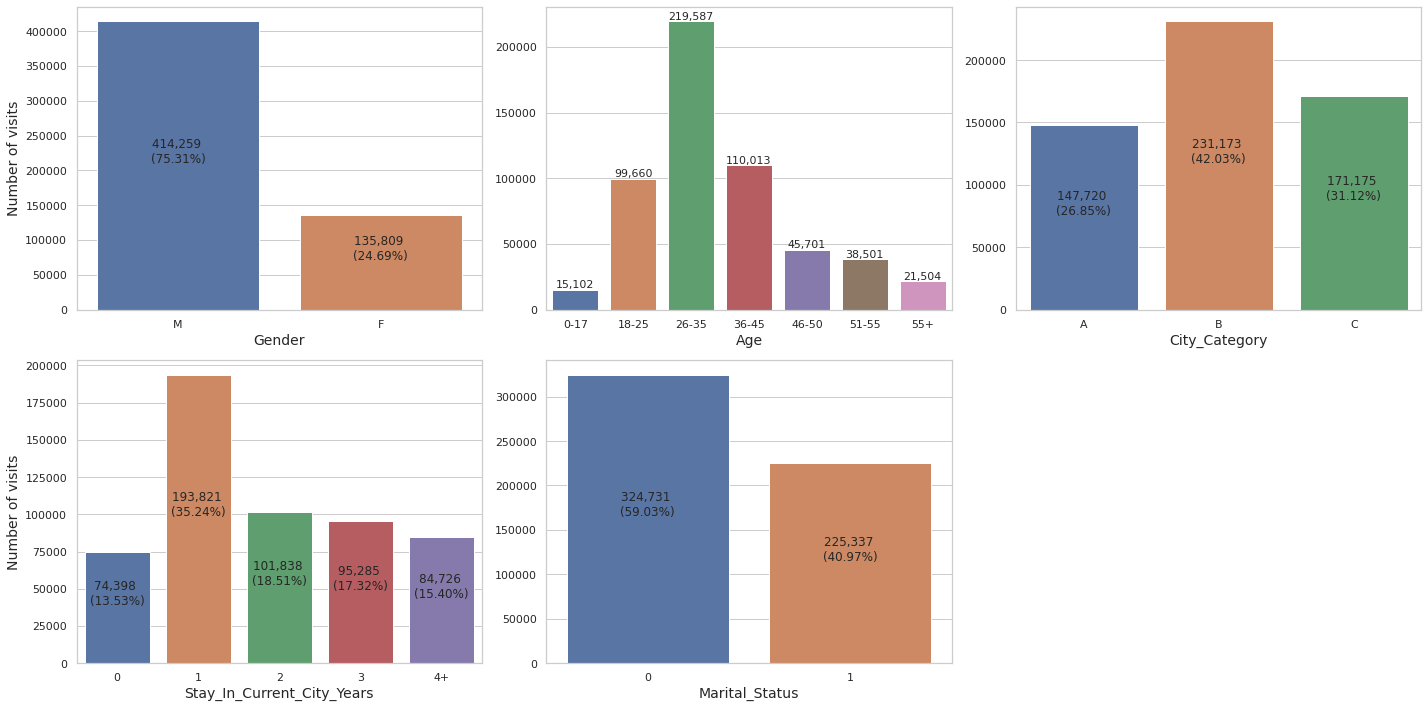

In [119]:
#checking the full data to understand the number of visits in to walmart
fig = plt.figure(figsize=(20,10))
t_c = df.shape[0]
plt.subplot(2, 3, 1)
ax = sns.countplot(x = df['Gender'],order = ['M','F'])
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Number of visits',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/t_c),
 (p.get_x() + p.get_width()/2, p.get_height()/2),fontsize = 12,ha = 'center', va = 'bottom')
plt.subplot(2, 3, 2)
ax = sns.countplot(x = df['Age'],order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+'])
plt.xlabel('Age',fontsize=14)
plt.ylabel('',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f}".format(p.get_height()),
 (p.get_x() + p.get_width()/2, p.get_height()+20),fontsize = 11,ha = 'center', va = 'bottom')
plt.subplot(2, 3, 3)
ax = sns.countplot(x = df['City_Category'],order = ['A','B','C'])
plt.xlabel('City_Category',fontsize=14)
plt.ylabel('',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/t_c),
 (p.get_x() + p.get_width()/2, p.get_height()/2),fontsize = 12,ha = 'center', va = 'bottom')
plt.subplot(2, 3, 4)
ax = sns.countplot(x = df['Stay_In_Current_City_Years'],order = ['0','1','2','3','4+'])
plt.xlabel('Stay_In_Current_City_Years',fontsize=14)
plt.ylabel('Number of visits',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/t_c),
 (p.get_x() + p.get_width()/2, p.get_height()/2),fontsize = 12,ha = 'center', va = 'bottom')
plt.subplot(2, 3, 5)
ax = sns.countplot(x = df['Marital_Status'])
plt.xlabel('Marital_Status',fontsize=14)
plt.ylabel('',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/t_c),
 (p.get_x() + p.get_width()/2, p.get_height()/2),fontsize = 12,ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()

### **Observations:**

* People living in a city for less than 1 year are spending more.
* 75% of total purchase count belongs to male and rest to female.
* Around 78% of total purchase count done by Users, those belongs to age group between 18+year to 45 years.
* Approximate 59 % of total purchase count belongs to the unmarried users.


#**Visual Analysis -  Bivariate**

### **Bi-Variate Analysis Gender vs other variables**

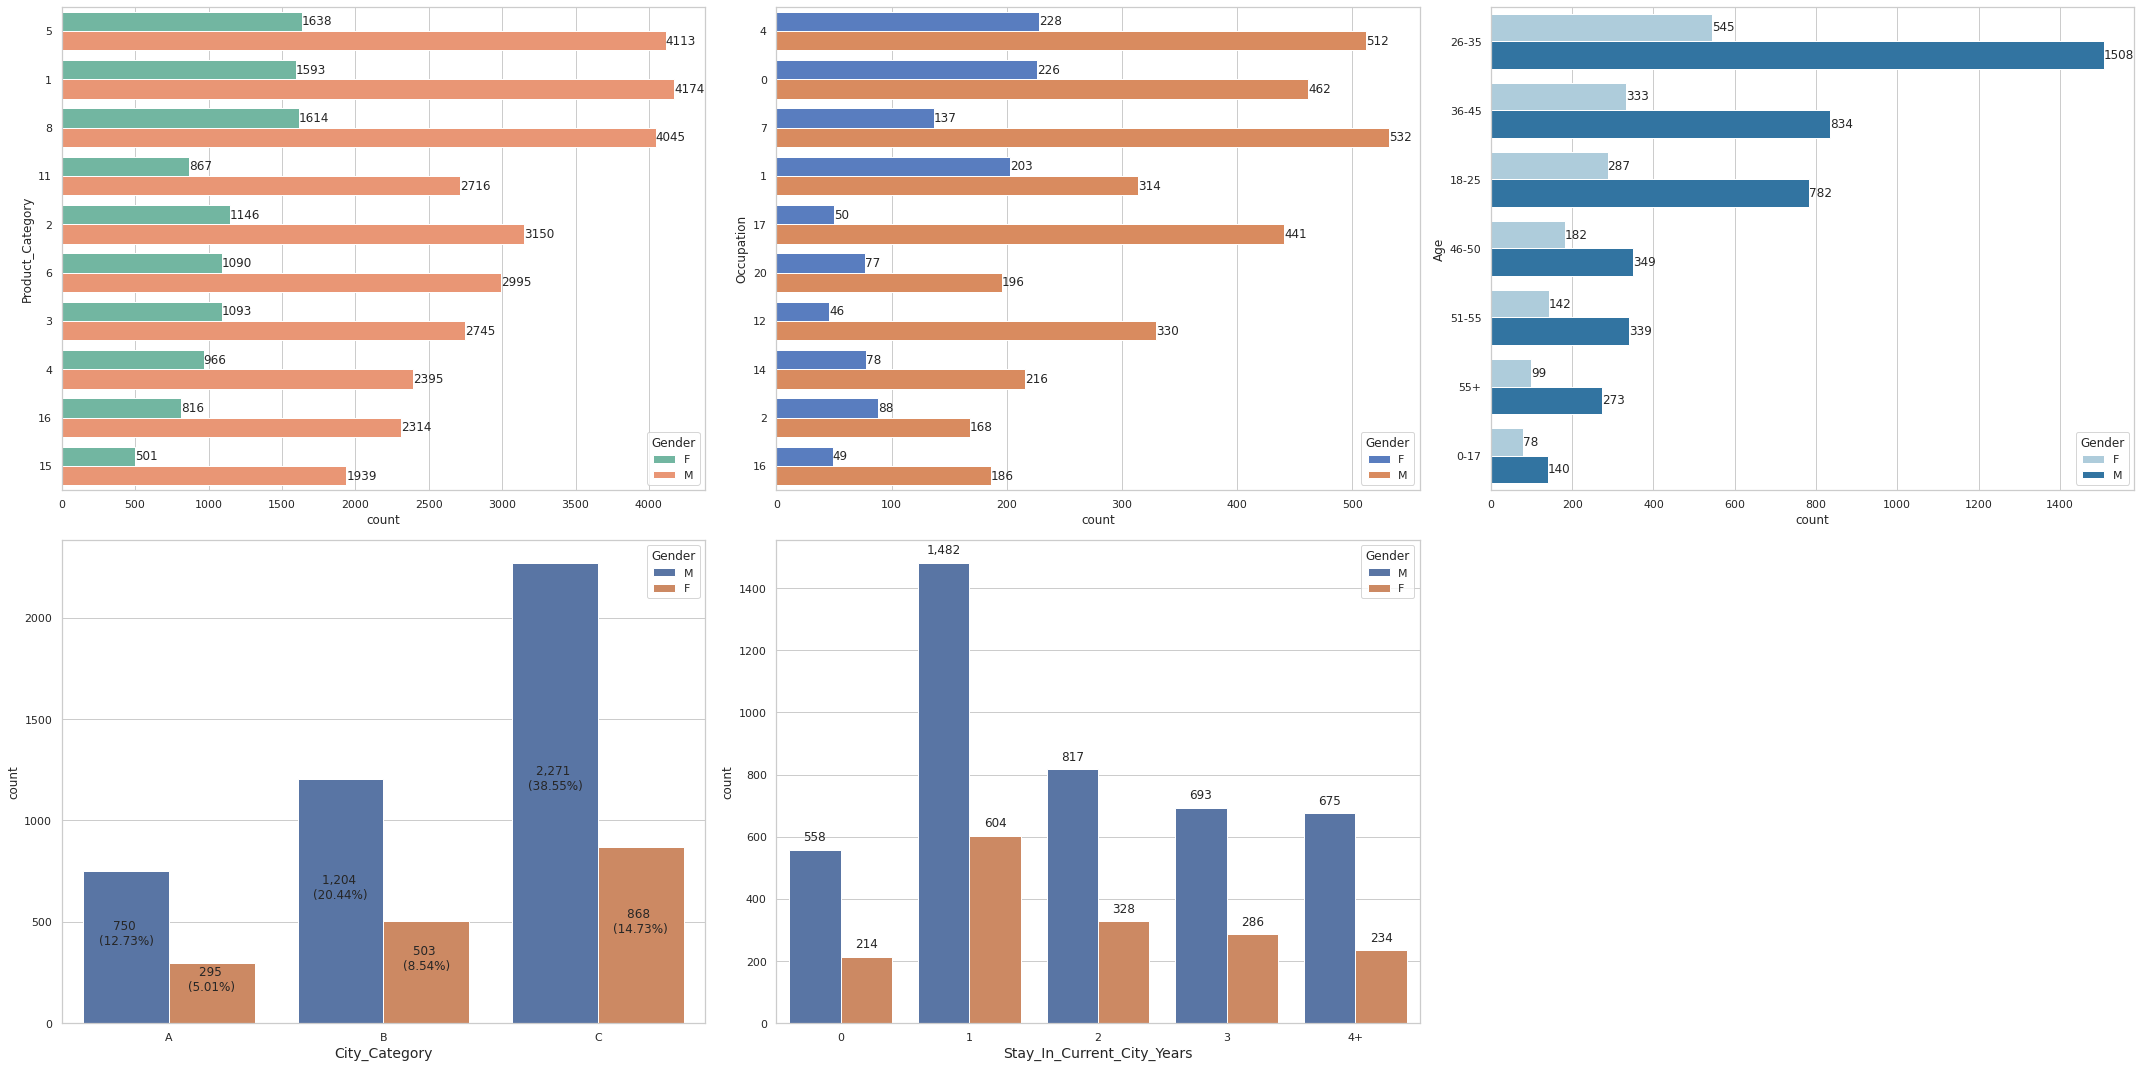

In [120]:
# Bi-Variate Analysis Gender vs other variables
plt.figure(figsize=(30,15))
plt.subplot(2, 3, 1)
sns.set(style="whitegrid")
ax = sns.countplot(y="Product_Category", data=df_unique_pro, palette="Set2", order=df["Product_Category"].value_counts().index[0:10],hue="Gender")
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(2, 3, 2)
sns.set(style="whitegrid")
ax = sns.countplot(y="Occupation", data=df_unique, palette="muted", order=df["Occupation"].value_counts().index[0:10],hue="Gender")
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(2, 3, 3)
sns.set(style="whitegrid")
ax = sns.countplot(y="Age", data=df_unique, palette="Paired", order=df["Age"].value_counts().index[0:10],hue="Gender")
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(2, 3, 4)
ax = sns.countplot(data = df_unique,x = df_unique['City_Category'],order = ['A','B','C'],hue='Gender',hue_order=['M','F'])
plt.xlabel('City_Category',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f} \n({:,.2f}%)".format(p.get_height(), p.get_height() * 100/5891),
 (p.get_x() + p.get_width()/2, p.get_height()/2),ha = 'center', va = 'bottom')
plt.subplot(2, 3, 5)
ax = sns.countplot(data = df_unique,x = df_unique['Stay_In_Current_City_Years'],
 order = ['0','1','2','3','4+'],hue='Gender',hue_order=['M','F'])
plt.xlabel('Stay_In_Current_City_Years',fontsize=14)
for p in ax.patches:
 ax.annotate("{:,.0f}".format(p.get_height()),
 (p.get_x() + p.get_width()/2, p.get_height()+20),ha = 'center', va = 'bottom')
plt.tight_layout()
plt.show()

###**Bi-Variate Analysis Marital status vs other variables**

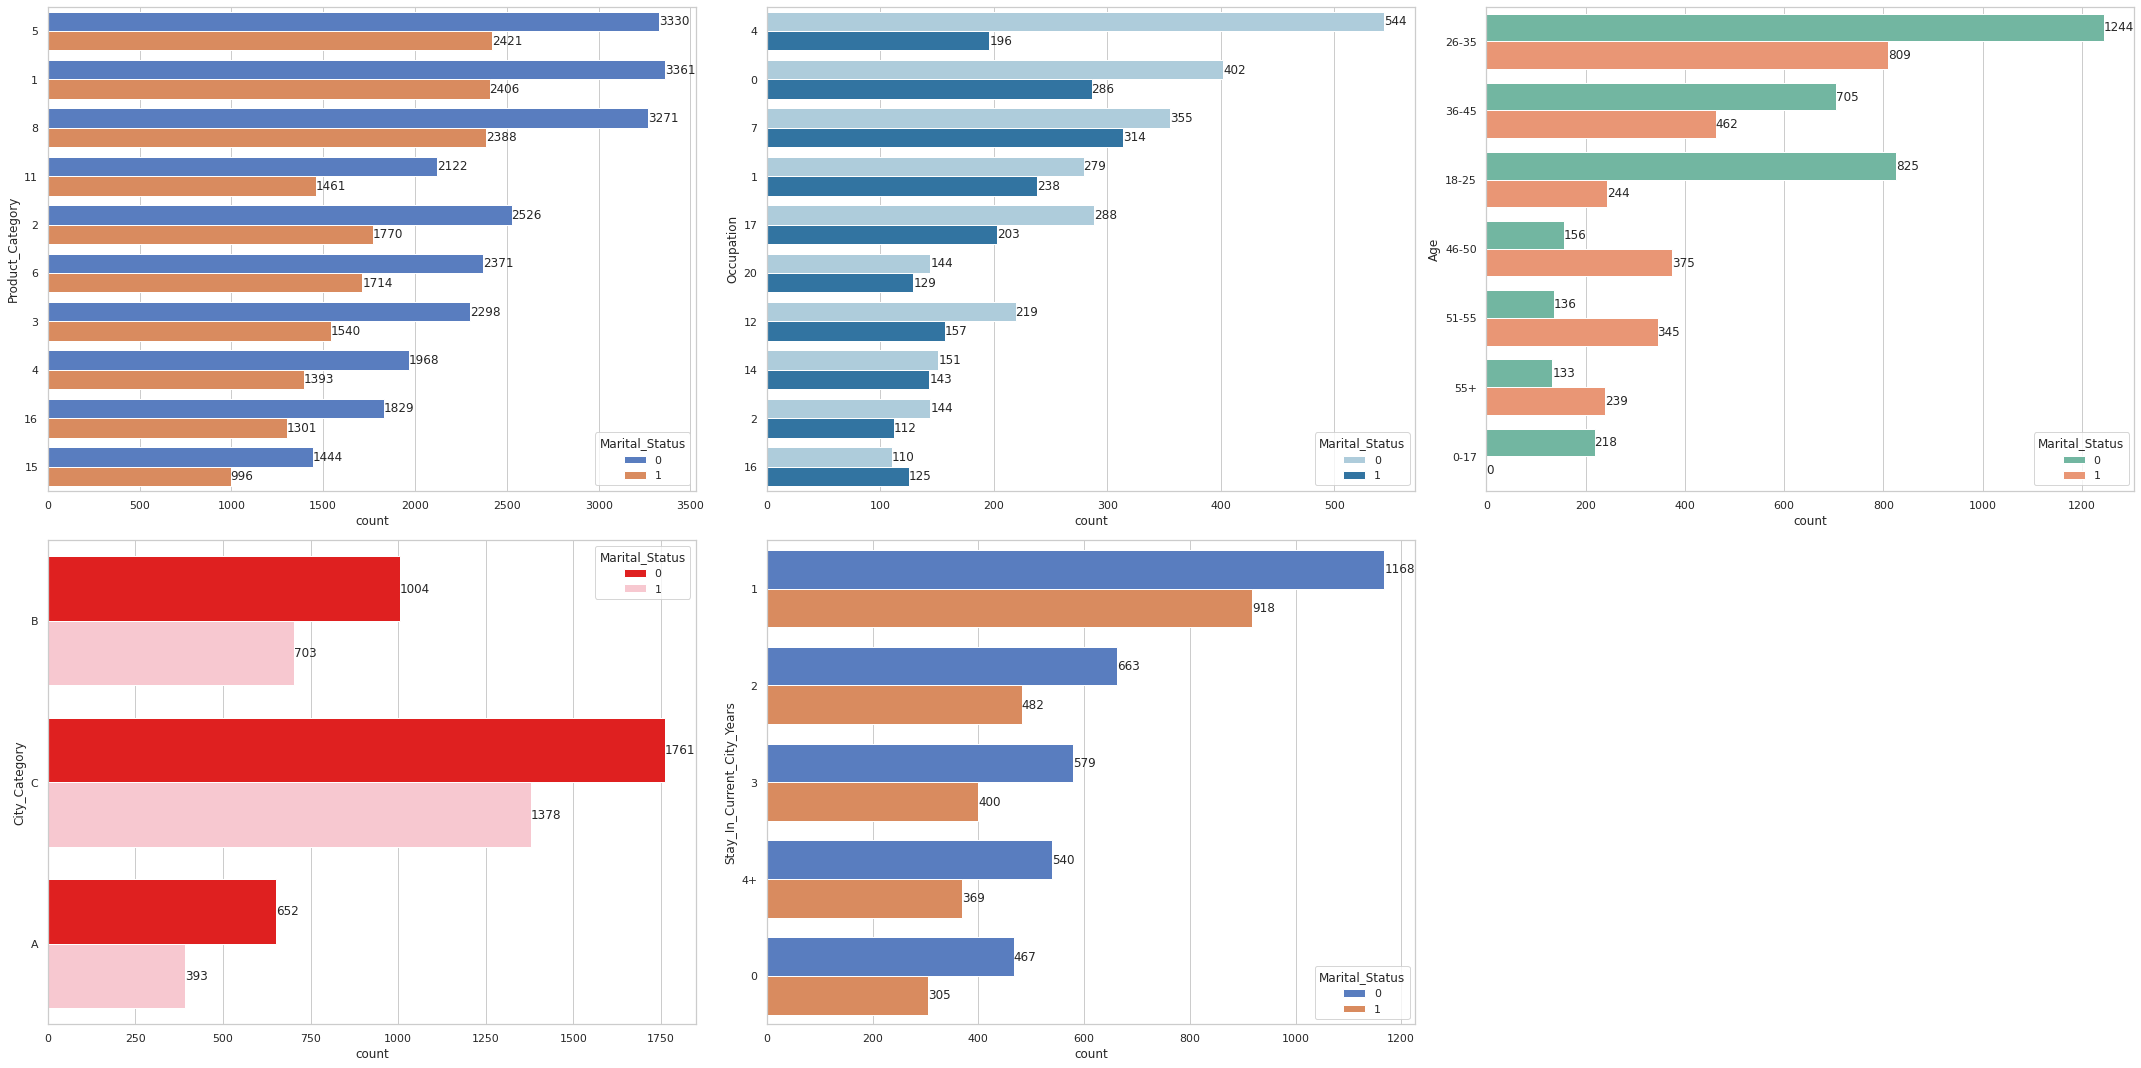

In [121]:
# Bi-Variate Analysis Marital status vs other variables 
plt.figure(figsize=(30,15))
plt.subplot(2, 3, 1)
sns.set(style="whitegrid")
ax = sns.countplot(y="Product_Category", data=df_unique_pro, palette="muted", order=df["Product_Category"].value_counts().index[0:10],hue="Marital_Status")
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(2, 3, 2)
sns.set(style="whitegrid")
ax = sns.countplot(y="Occupation", data=df_unique, palette="Paired", order=df["Occupation"].value_counts().index[0:10],hue="Marital_Status")
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(2, 3, 3)
sns.set(style="whitegrid")
ax = sns.countplot(y="Age", data=df_unique, palette="Set2", order=df["Age"].value_counts().index[0:10],hue="Marital_Status")
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(2, 3, 4)
sns.set(style="whitegrid")
ax = sns.countplot(y="City_Category", data=df_unique, palette=["red","pink"], order=df["City_Category"].value_counts().index[0:10],hue="Marital_Status")
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(2, 3, 5)
sns.set(style="whitegrid")
ax = sns.countplot(y="Stay_In_Current_City_Years", data=df_unique, palette="muted", order=df["Stay_In_Current_City_Years"].value_counts().index[0:10],hue="Marital_Status")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

### **Observations:**
* From Bivariate graphical analysis, it is clear that the more active Users are belongs to male and unmarried categories.


###**Analysis of Cumulative purchase Data**

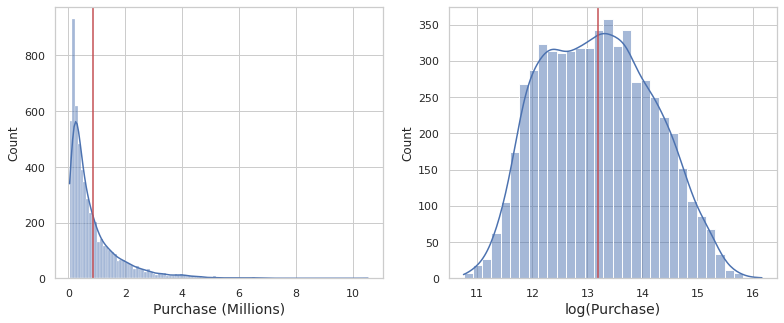

In [122]:
# Analysis of Cumulative purchase Data
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
sns.histplot(df_unique['Purchase']/1000000,kde = True)
plt.axvline((df_unique["Purchase"]/1000000).mean(),color="r")
plt.xlabel('Purchase (Millions)',fontsize=14)
plt.subplot(1, 3, 2)
df_unique['log'] = df_unique['Purchase'].apply(np.log)
sns.histplot(df_unique['log'],kde = True)
plt.xlabel('log(Purchase)',fontsize=14)
plt.axvline(df_unique["log"].mean(),color="r")
plt.show()

### **Observations:**
* While plotting total purchase amount for every unique user is following log normal distribution. And right side we are obtaining normal distribution curve.
* Purchase column detected with some outlier values, as in histogram we can see that mean line (green) is ahead of median line(red).



#**Outlier Detection**

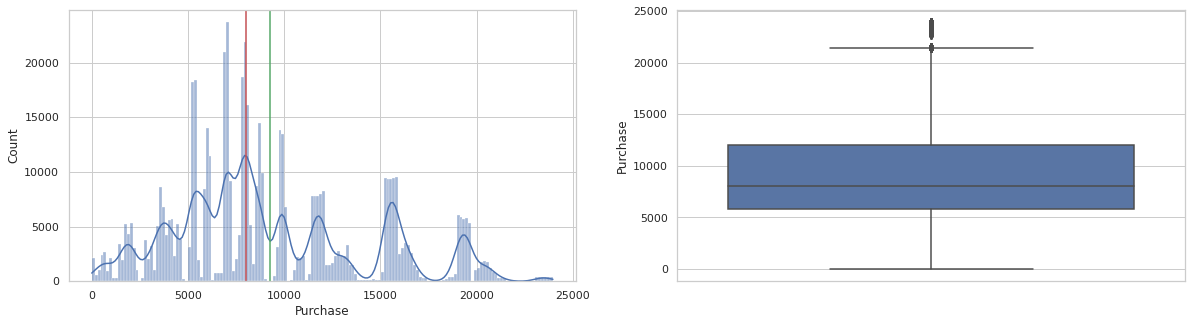

In [123]:
#Analysis of Purchase Data
#Distribution of the values and outlier detection
fig = plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Purchase'],kde = True)
plt.axvline(df["Purchase"].mean(),color="g")
plt.axvline(df["Purchase"].median(),color="r")
plt.subplot(1, 2, 2)
sns.boxplot(data=df,y='Purchase')
plt.show()

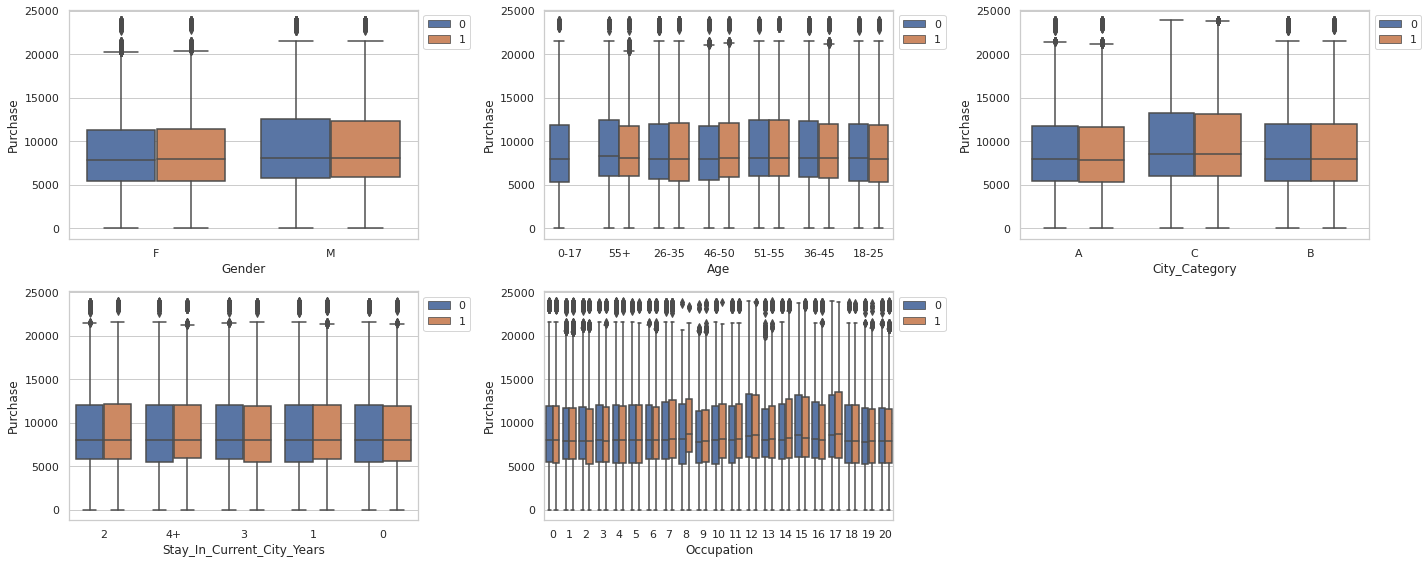

In [124]:
# before outlier removal
fig=plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.boxplot(data=df, x="Gender", y="Purchase", hue="Marital_Status")
plt.ylabel("Purchase",fontsize=12)
plt.xlabel("Gender",fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.subplot(2,3,2)
sns.boxplot(data=df, x="Age", y="Purchase", hue="Marital_Status")
plt.ylabel("Purchase",fontsize=12)
plt.xlabel("Age",fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.subplot(2,3,3)
sns.boxplot(data=df, x="City_Category", y="Purchase", hue="Marital_Status")
plt.ylabel("Purchase",fontsize=12)
plt.xlabel("City_Category",fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.subplot(2,3,4)
sns.boxplot(data=df, x="Stay_In_Current_City_Years", y="Purchase", hue="Marital_Status")
plt.ylabel("Purchase",fontsize=12)
plt.xlabel("Stay_In_Current_City_Years",fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.subplot(2,3,5)
sns.boxplot(data=df, x="Occupation", y="Purchase", hue="Marital_Status")
plt.ylabel("Purchase",fontsize=12)
plt.xlabel("Occupation",fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

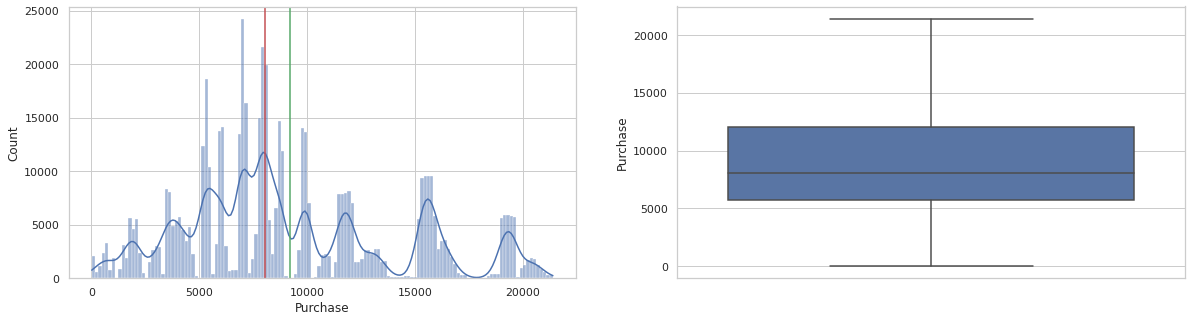

In [125]:
#Outlier Removal
Q25 = df['Purchase'].quantile(0.25)
Q75 = df['Purchase'].quantile(0.75)
IQR = Q75-Q25
df = df[(df['Purchase'] > Q25 - 1.5*IQR) & (df['Purchase'] < Q75 + 1.5*IQR)]
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Purchase'],kde = True)
plt.axvline(df["Purchase"].mean(),color="g")
plt.axvline(df["Purchase"].median(),color="r")
plt.subplot(1, 2, 2)
sns.boxplot(data=df,y='Purchase')
plt.show()

###**For categorical variable(s): Boxplot**

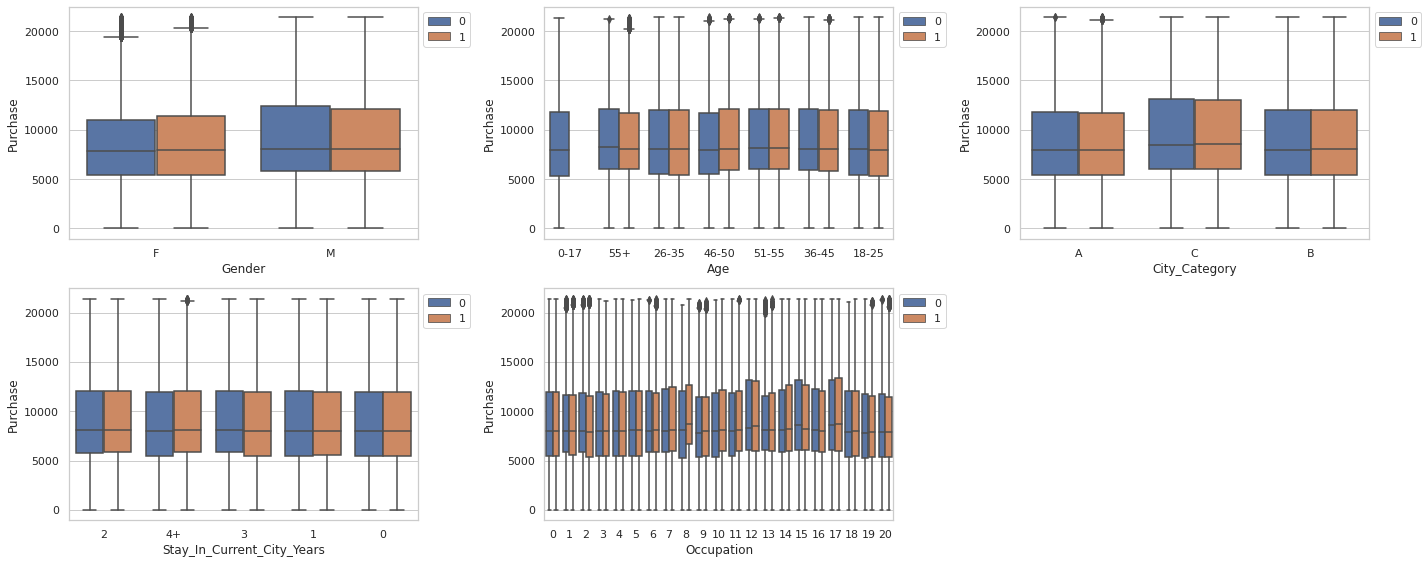

In [126]:
fig=plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.boxplot(data=df, x="Gender", y="Purchase", hue="Marital_Status")
plt.ylabel("Purchase",fontsize=12)
plt.xlabel("Gender",fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.subplot(2,3,2)
sns.boxplot(data=df, x="Age", y="Purchase", hue="Marital_Status")
plt.ylabel("Purchase",fontsize=12)
plt.xlabel("Age",fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.subplot(2,3,3)
sns.boxplot(data=df, x="City_Category", y="Purchase", hue="Marital_Status")
plt.ylabel("Purchase",fontsize=12)
plt.xlabel("City_Category",fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.subplot(2,3,4)
sns.boxplot(data=df, x="Stay_In_Current_City_Years", y="Purchase", hue="Marital_Status")
plt.ylabel("Purchase",fontsize=12)
plt.xlabel("Stay_In_Current_City_Years",fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.subplot(2,3,5)
sns.boxplot(data=df, x="Occupation", y="Purchase", hue="Marital_Status")
plt.ylabel("Purchase",fontsize=12)
plt.xlabel("Occupation",fontsize=12)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

### **Observations:**
* After treating outliers in main data set, we still come up with some outliers’ values in female category.
* As we can clearly observe that spending difference between the unmarried and married is less as compare to the spending difference between male and female.

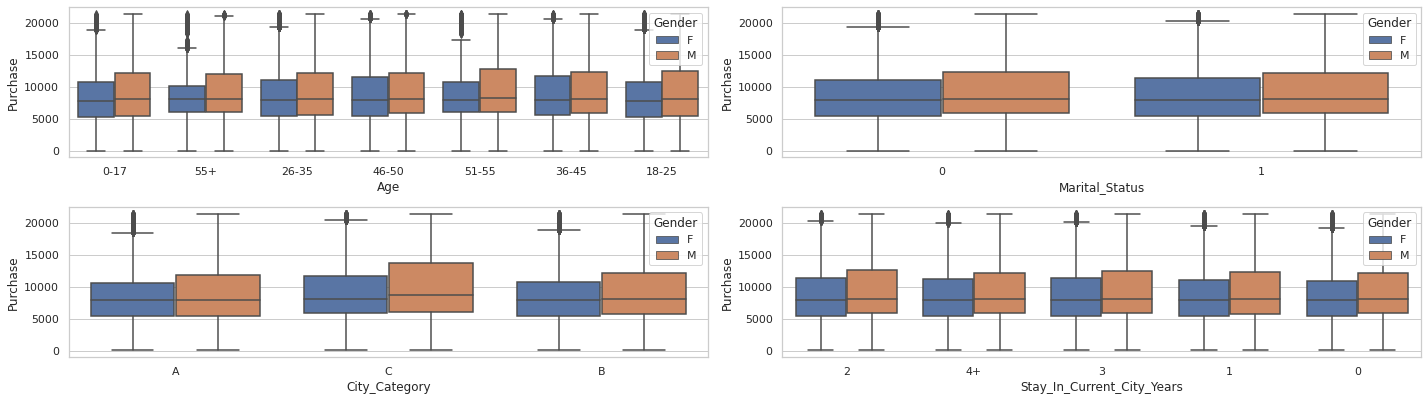

In [127]:
fig = plt.figure(figsize=(20,8))
plt.subplot(3, 2, 1)
sns.boxplot(data=df,x='Age',y='Purchase',hue = 'Gender')
plt.subplot(3, 2, 2)
sns.boxplot(data=df,x='Marital_Status',y='Purchase',hue = 'Gender')
plt.subplot(3, 2, 3)
sns.boxplot(data=df,x='City_Category',y='Purchase',hue = 'Gender')
plt.subplot(3, 2, 4)
sns.boxplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',hue = 'Gender')
plt.tight_layout()
plt.show()

###**For correlation: Heatmaps, Pairplots**

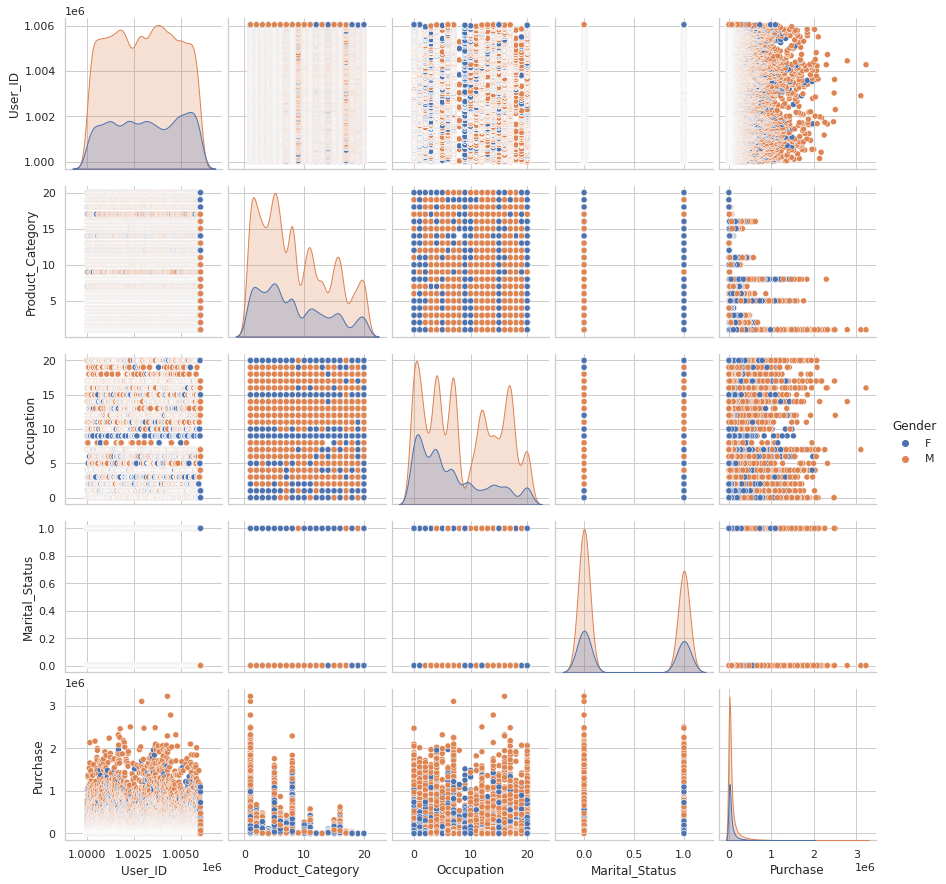

In [128]:
sns.pairplot(df_unique_pro,hue="Gender")
plt.show()

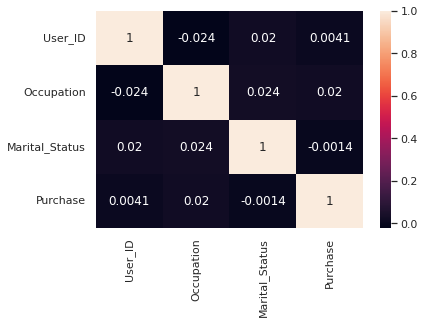

In [129]:
d_f=sns.heatmap(df[['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase']].corr(), annot=True)

### **Observations:**
* While plotting heatmap and pairplot, we found that there is no strong correlation between the variables as all correlation coefficients values are less than the 0.024.

##**Preparing data for bootstrapping**

In [130]:
#data for bootstrapping

df_female=df[df["Gender"]=="F"]
survey_f=np.array([df_female["Purchase"]]).flatten()

df_male=df[df["Gender"]=="M"]
survey_m=np.array([df_male["Purchase"]]).flatten()

df_married=df[df["Marital_Status"]==1]
survey_married=np.array([df_married["Purchase"]]).flatten()

df_unmarried=df[df["Marital_Status"]==0]
survey_unmarried=np.array([df_unmarried["Purchase"]]).flatten()

df_17=df[df["Age"]=="0-17"]
survey_17=np.array([df_17["Purchase"]]).flatten()
df_25=df[df["Age"]=="18-25"]
survey_25=np.array([df_25["Purchase"]]).flatten()
df_35=df[df["Age"]=="26-35"]
survey_35=np.array([df_35["Purchase"]]).flatten()
df_45=df[df["Age"]=="36-45"]
survey_45=np.array([df_45["Purchase"]]).flatten()
df_50=df[df["Age"]=="46-50"]
survey_50=np.array([df_50["Purchase"]]).flatten()
df_55=df[df["Age"]=="51-55"]
survey_55=np.array([df_55["Purchase"]]).flatten()
df_55p=df[df["Age"]=="55+"]
survey_55p=np.array([df_55p["Purchase"]]).flatten()

#**Analysis on the basis of Gender:**

In [131]:
# CL BASED ON GENDER
male_m = round(np.mean(df_male['Purchase']),2)
male_md = np.median(df_male['Purchase'])
male_std = round(np.std(df_male['Purchase']),2)
male_var = np.var(df_male['Purchase'])
female_m = round(np.mean(df_female['Purchase']),2)
female_md = np.median(df_female['Purchase'])
female_std = round(np.std(df_female['Purchase']),2)
female_var = np.var(df_female['Purchase'])
arr = [[male_m,male_md,male_std,male_var],[female_m,female_md,female_std,female_var]]
Gend_df = pd.DataFrame(data=arr, index=['Male','Female'],
 columns=['Mean','Median','Std_Deviation','Variance'])
Gend_df


,Mean,Median,Std_Deviation,Variance
Male,9367.72,8089.0,5009.23,2.509237e+07
Female,8671.05,7906.0,4679.04,2.189343e+07


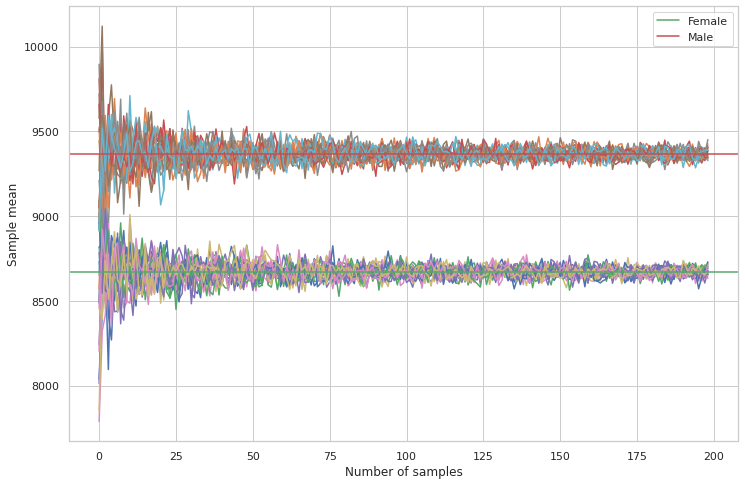

In [132]:
#sample mean trend for Gender
fig = plt.figure(figsize=(12,8))
sample_female_mean_trend=[]
sample_male_mean_trend=[]
for person in range(20):
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_f,size=num_sample)
    sample_mean=np.mean(sample)
    sample_female_mean_trend.append(sample_mean)
  plt.plot(sample_female_mean_trend)
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_m,size=num_sample)
    sample_mean=np.mean(sample)
    sample_male_mean_trend.append(sample_mean)
  plt.plot(sample_male_mean_trend)
  sample_male_mean_trend=[] #next person start afresh
  sample_female_mean_trend=[] #next person start afresh
plt.xlabel("Number of samples")
plt.ylabel("Sample mean")
plt.axhline(df_female["Purchase"].mean(),color="g",label = 'Female')
plt.axhline(df_male["Purchase"].mean(),color="r",label='Male')
plt.legend()
plt.show()

### **Observations:**

* It is clear from distribution, as sample size increases, the standard deviation of the sample means becomes smaller and smaller as the population standard deviation is being divided by larger and larger values of the square root of n. And it is also validation of central limit theorem (CLT) statement.
* The plot shows the difference between mean spending for male and female users.


In [133]:
def CLT_GEN(sample_size,iter,data1=survey_f,data2=survey_m):
  fig = plt.figure(figsize=(12,8))
  bootstrapped_means_survey_female=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(data1,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_female.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_female,label="F",fill=True)
  bootstrapped_means_survey_male=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(data2,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_male.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_male,label="M",fill=True)
  plt.legend()
  m90 = np.percentile(bootstrapped_means_survey_male, [5, 95]).round(2)
  m95 = np.percentile(bootstrapped_means_survey_male, [2.5, 97.5]).round(2)
  m99 = np.percentile(bootstrapped_means_survey_male, [0.5, 99.5]).round(2)
  f90 = np.percentile(bootstrapped_means_survey_female, [5, 95]).round(2)
  f95 = np.percentile(bootstrapped_means_survey_female, [2.5, 97.5]).round(2)
  f99 = np.percentile(bootstrapped_means_survey_female, [0.5, 99.5]).round(2)
  std_e_f = round((4679.04/(sample_size)**0.5),2)
  std_e_m = round((5009.23/(sample_size)**0.5),2)
  arr = [['Male','90%',m90[0],m90[1],m90[1]-m90[0],(m90[1]-m90[0])/(2*1.645)],
  ['Female','90%',f90[0],f90[1],f90[1]-f90[0],(f90[1]-f90[0])/(2*1.645)],
  ['Male','95%',m95[0],m95[1],m95[1]-m95[0],(m95[1]-m95[0])/(2*1.96)],
  ['Female','95%',f95[0],f95[1],f95[1]-f95[0],(f95[1]-f95[0])/(2*1.96)],
  ['Male','99%',m99[0],m99[1],m99[1]-m99[0],(m99[1]-m99[0])/(2*2.575)],
  ['Female','99%',f99[0],f99[1],f99[1]-f99[0],(f99[1]-f99[0])/(2*2.575)]]
  df = pd.DataFrame(data=arr,
  columns=['Gender','Confidence_L','Lower Limit','Upper Limit',
  'diff','std_error'])
  plt.show()
  if sample_size>=100000:
    return df

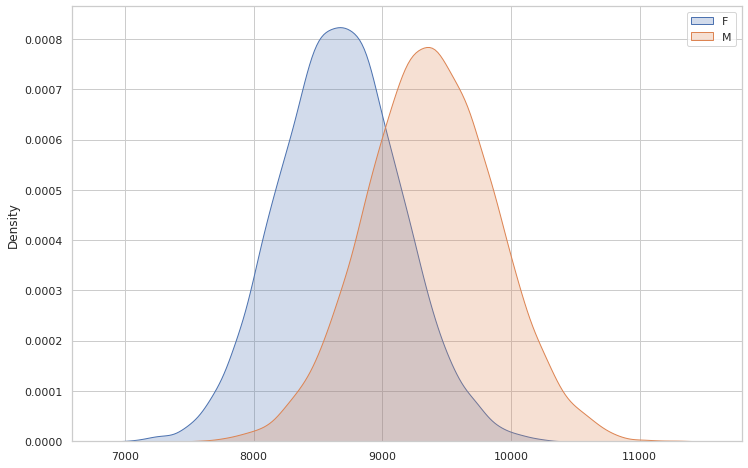

In [134]:
CLT_GEN(100,10000)

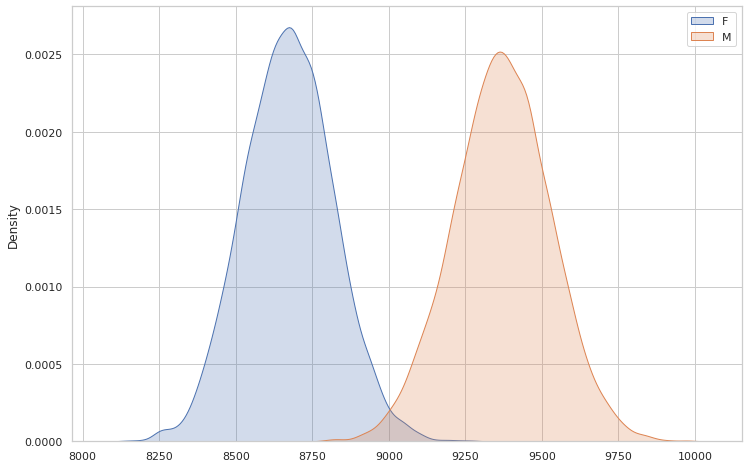

In [135]:
CLT_GEN(1000,10000)

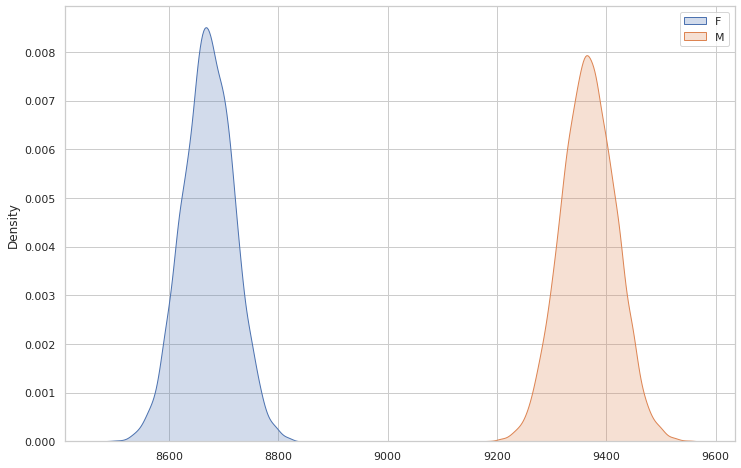

In [136]:
CLT_GEN(10000,10000)

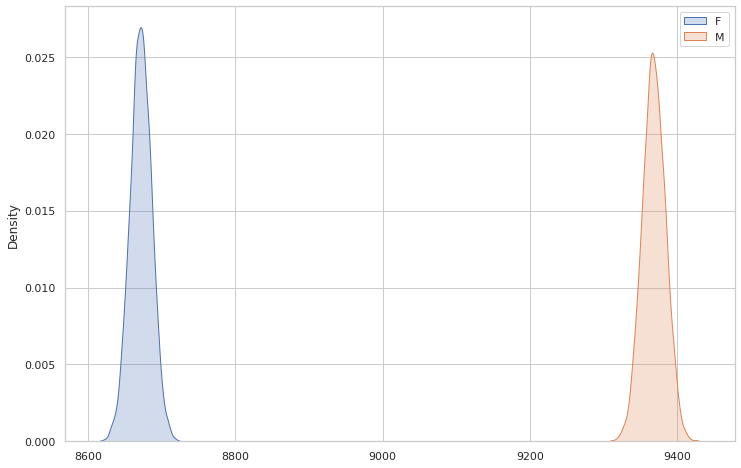

,Gender,Confidence_L,Lower Limit,Upper Limit,diff,std_error
0,Male,90%,9341.41,9394.29,52.88,16.072948
1,Female,90%,8646.64,8695.24,48.60,14.772036
2,Male,95%,9336.91,9398.65,61.74,15.750000
3,Female,95%,8642.03,8700.06,58.03,14.803571
4,Male,99%,9326.39,9408.98,82.59,16.036893
5,Female,99%,8631.80,8709.60,77.80,15.106796


In [137]:
CLT_GEN(100000,10000)

### **Observations:**
* For sample size 1,00,000 and iteration of 10000 with 90% confidence level, the confidence interval for male is [9342.22,9394.05] and standard error is 15.75.
* For sample size 1,00,000 and iteration of 10000 with 90% confidence level, the confidence interval for female is [8646.73, 8695.41] and standard error is 14.79.
* For sample size 1,00,000 and iteration of 10000 with 95% confidence level, the confidence interval for male is [9337.78, 9399.11] and standard error is 15.64.
* For sample size 1,00,000 and iteration of 10000 with 95% confidence level, the confidence interval for female is [8642.07, 8700.25] and standard error is 14.84.
* For sample size 1,00,000 and iteration of 10000 with 99% confidence level, the confidence interval for male users is [9327.51, 9409.49] and standard error is 15.91
* For sample size 1,00,000 and iteration of 10000 with 99% confidence level, the confidence interval for female users is [8633.54, 8708.80] and standard error is 14.61.
* It is also clear from graph the average spending of male is more than the female.


## **Analysis on the basis of Marital Status:** 

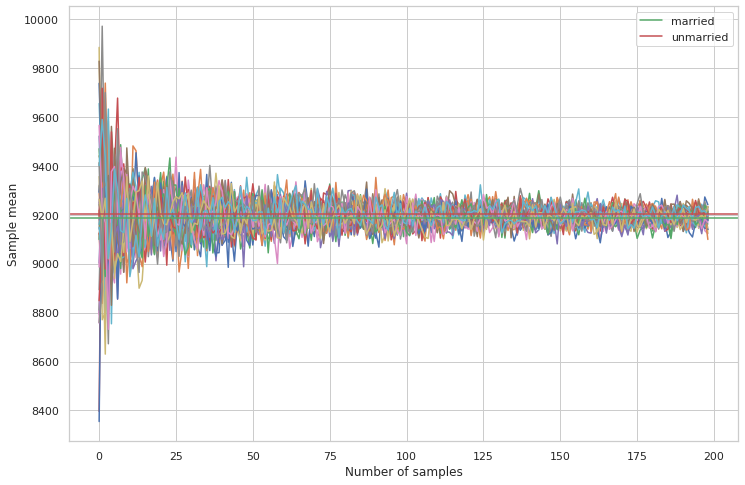

In [138]:
#sample mean trend for married & unmarried users 
fig = plt.figure(figsize=(12,8))
sample_married_mean_trend=[]
sample_unmarried_mean_trend=[]
for person in range(20):
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_married,size=num_sample)
    sample_mean=np.mean(sample)
    sample_married_mean_trend.append(sample_mean)
  plt.plot(sample_married_mean_trend)
#sample mean trend for unmarried users 
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_unmarried,size=num_sample)
    sample_mean=np.mean(sample)
    sample_unmarried_mean_trend.append(sample_mean)
  plt.plot(sample_unmarried_mean_trend)
  sample_unmarried_mean_trend=[] #next person start afresh
  sample_married_mean_trend=[] #next person start afresh
plt.axhline(df_married["Purchase"].mean(),color="g",label = 'married')
plt.axhline(df_unmarried["Purchase"].mean(),color="r",label='unmarried')
plt.legend()
plt.xlabel("Number of samples")
plt.ylabel("Sample mean")
plt.show()

In [139]:
def CLT_Marital_Status(sample_size,iter,data1=survey_married,data2=survey_unmarried):
  fig = plt.figure(figsize=(12,8))
  bootstrapped_means_survey_married=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(survey_married,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_married.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_married,label="married",fill=True)
  bootstrapped_means_survey_unmarried=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(survey_unmarried,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_unmarried.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_unmarried,label="unmarried",fill=True)
  plt.legend()
  m90 = np.percentile(bootstrapped_means_survey_married, [5, 95]).round(2)
  m95 = np.percentile(bootstrapped_means_survey_married, [2.5, 97.5]).round(2)
  m99 = np.percentile(bootstrapped_means_survey_married, [0.5, 99.5]).round(2)
  u90 = np.percentile(bootstrapped_means_survey_unmarried, [5, 95]).round(2)
  u95 = np.percentile(bootstrapped_means_survey_unmarried, [2.5, 97.5]).round(2)
  u99 = np.percentile(bootstrapped_means_survey_unmarried, [0.5, 99.5]).round(2)

  arr = [['Married','90%',m90[0],m90[1],m90[1]-m90[0],(m90[1]-m90[0])/(2*1.645)],
  ['UnMarried','90%',u90[0],u90[1],u90[1]-u90[0],(u90[1]-u90[0])/(2*1.645)],
  ['Married','95%',m95[0],m95[1],m95[1]-m95[0],(m95[1]-m95[0])/(2*1.96)],
  ['UnMarried','95%',u95[0],u95[1],u95[1]-u95[0],(u95[1]-u95[0])/(2*1.96)],
  ['Married','99%',m99[0],m99[1],m99[1]-m99[0],(m99[1]-m99[0])/(2*2.575)],
  ['UnMarried','99%',u99[0],u99[1],u99[1]-u99[0],(u99[1]-u99[0])/(2*2.575)]
  ]
  df = pd.DataFrame(data=arr, columns=['Marital_Status','Confidence_L','Lower Limit','Upper Limit',
  'diff','std_error'])
  plt.show()
  if sample_size>=100000:
    return df

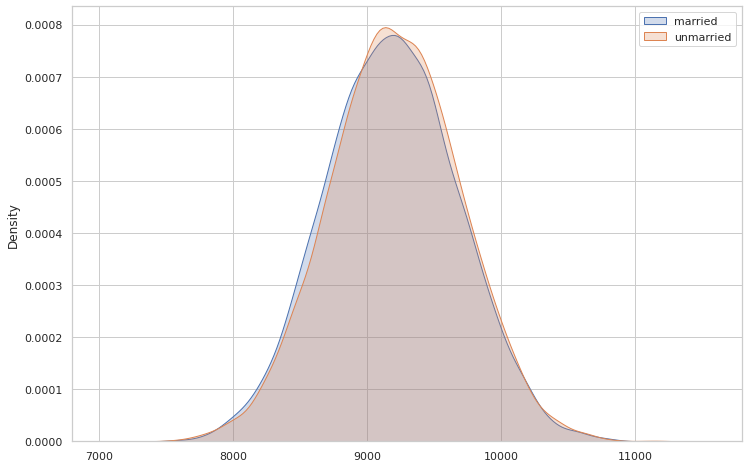

In [140]:
CLT_Marital_Status(100,10000)

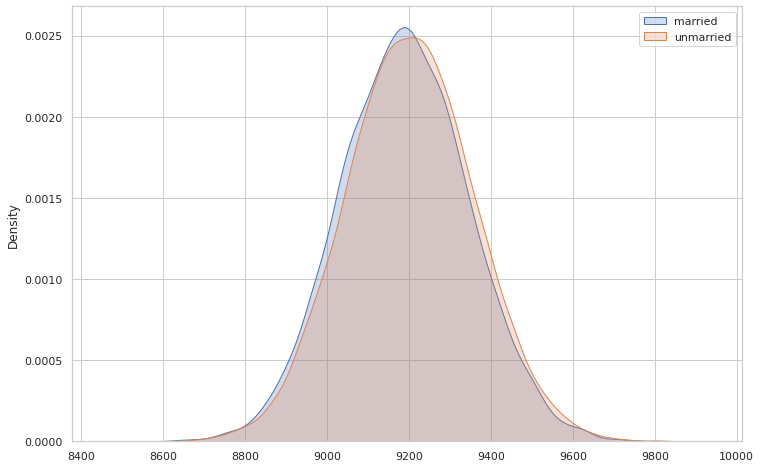

In [141]:
CLT_Marital_Status(1000,10000)

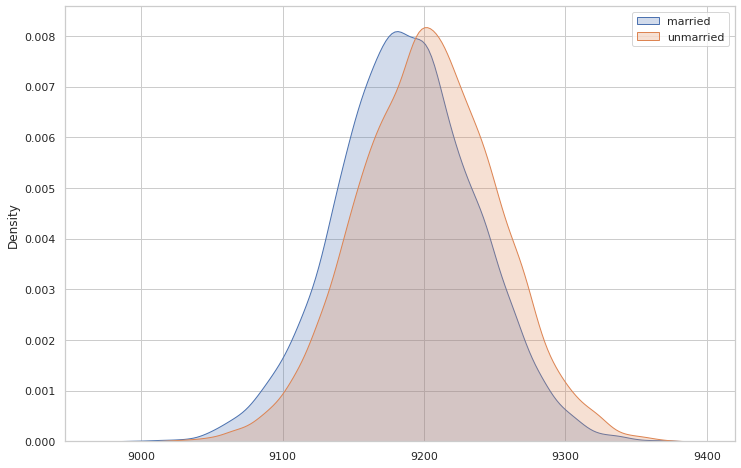

In [142]:
CLT_Marital_Status(10000,10000)

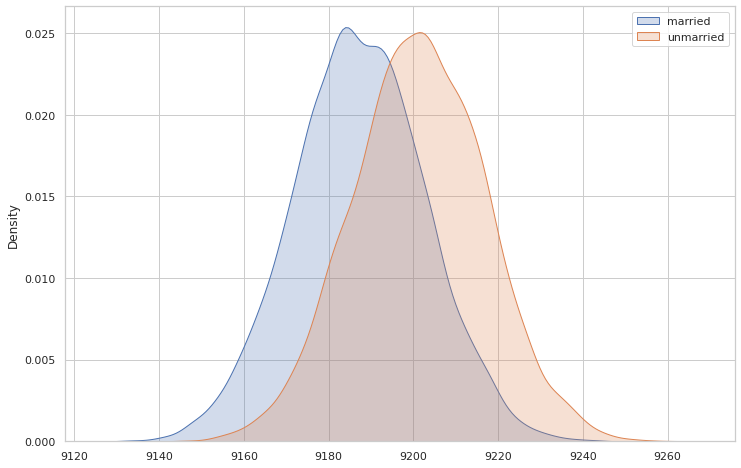

,Marital_Status,Confidence_L,Lower Limit,Upper Limit,diff,std_error
0,Married,90%,9161.58,9212.95,51.37,15.613982
1,UnMarried,90%,9175.47,9226.73,51.26,15.580547
2,Married,95%,9156.85,9217.67,60.82,15.515306
3,UnMarried,95%,9170.71,9232.24,61.53,15.696429
4,Married,99%,9147.94,9227.04,79.10,15.359223
5,UnMarried,99%,9161.25,9241.10,79.85,15.504854


In [143]:
CLT_Marital_Status(100000,10000)

### **Observations:**
* On the basis of marital status, there is no significant difference has been noticed in average spending between married and unmarried users.

## **Analysis on the basis of different Age Groups**

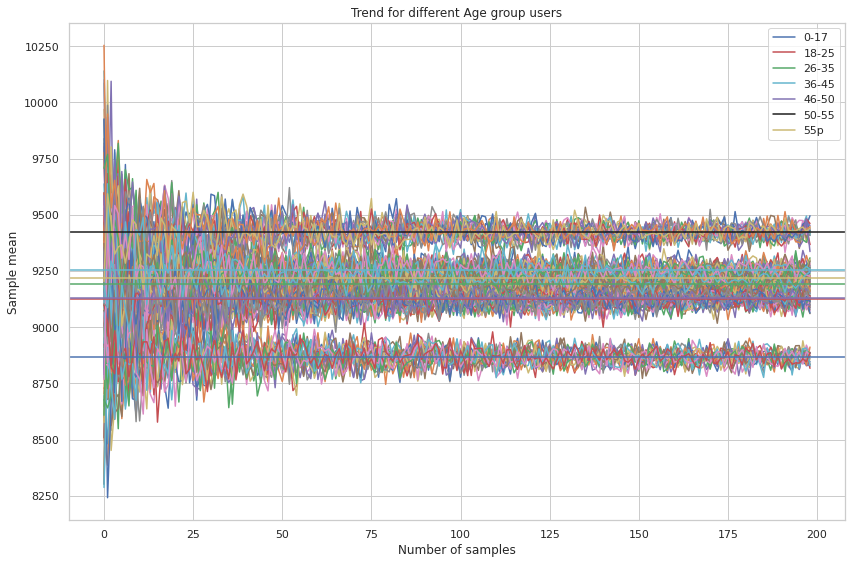

In [144]:
#sample mean trend for different Age group users 
fig = plt.figure(figsize=(12,8))
sample_17_mean_trend=[]
sample_25_mean_trend=[]
sample_35_mean_trend=[]
sample_45_mean_trend=[]
sample_50_mean_trend=[]
sample_55_mean_trend=[]
sample_55p_mean_trend=[]
for person in range(20):
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_17,size=num_sample)
    sample_mean=np.mean(sample)
    sample_17_mean_trend.append(sample_mean)
  plt.plot(sample_17_mean_trend)
  sample_17_mean_trend=[] #next person start afresh
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_25,size=num_sample)
    sample_mean=np.mean(sample)
    sample_25_mean_trend.append(sample_mean)
  plt.plot(sample_25_mean_trend)
  sample_25_mean_trend=[] #next person start afresh
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_35,size=num_sample)
    sample_mean=np.mean(sample)
    sample_35_mean_trend.append(sample_mean)
  plt.plot(sample_35_mean_trend)
  sample_35_mean_trend=[] #next person start afresh
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_45,size=num_sample)
    sample_mean=np.mean(sample)
    sample_45_mean_trend.append(sample_mean)
  plt.plot(sample_45_mean_trend)
  sample_45_mean_trend=[] #next person start afresh
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_50,size=num_sample)
    sample_mean=np.mean(sample)
    sample_50_mean_trend.append(sample_mean)
  plt.plot(sample_50_mean_trend)
  sample_50_mean_trend=[] #next person start afresh
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_55,size=num_sample)
    sample_mean=np.mean(sample)
    sample_55_mean_trend.append(sample_mean)
  plt.plot(sample_55_mean_trend)
  sample_55_mean_trend=[] #next person start afresh
  for num_sample in range(150,30000,150):
    sample=np.random.choice(survey_55p,size=num_sample)
    sample_mean=np.mean(sample)
    sample_55p_mean_trend.append(sample_mean)
  plt.plot(sample_55p_mean_trend)
  sample_55p_mean_trend=[] #next person start afresh
plt.xlabel("Number of samples")
plt.ylabel("Sample mean")
plt.title('Trend for different Age group users', fontsize=12)
plt.axhline(df_17["Purchase"].mean(),color="b",label = '0-17')
plt.axhline(df_25["Purchase"].mean(),color="r",label='18-25')
plt.axhline(df_35["Purchase"].mean(),color="g",label = '26-35')
plt.axhline(df_45["Purchase"].mean(),color="c",label='36-45')
plt.axhline(df_50["Purchase"].mean(),color="m",label = '46-50')
plt.axhline(df_55["Purchase"].mean(),color="k",label='50-55')
plt.axhline(df_55p["Purchase"].mean(),color="y",label = '55p')
plt.tight_layout()
plt.legend()
plt.show()


In [145]:
def CLT_Age(sample_size,iter,data1=survey_17,data2=survey_25,data3=survey_35,data4=survey_45,data5=survey_50,
            data6=survey_55,data7=survey_55p):
  fig = plt.figure(figsize=(12,8))
  bootstrapped_means_survey_17=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(survey_17,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_17.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_17,label="0-17",fill=True)
  bootstrapped_means_survey_25=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(survey_25,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_25.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_25,label="18-25",fill=True)
  bootstrapped_means_survey_35=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(survey_35,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_35.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_35,label="26-35",fill=True)
  bootstrapped_means_survey_45=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(survey_45,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_45.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_45,label="36-45",fill=True)
  bootstrapped_means_survey_50=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(survey_50,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_50.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_50,label="46-50",fill=True)
  bootstrapped_means_survey_55=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(survey_55,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_55.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_55,label="51-55",fill=True)
  bootstrapped_means_survey_55p=[]
  for rep in range(iter):
    bootstrapped_samples=np.random.choice(survey_55p,size=sample_size)
    bootstrapped_mean=np.mean(bootstrapped_samples)
    bootstrapped_means_survey_55p.append(bootstrapped_mean)
  sns.kdeplot(bootstrapped_means_survey_55p,label="55+",fill=True)
  plt.legend()
  s17_90 = np.percentile(bootstrapped_means_survey_17, [5, 95]).round(2)
  s17_95 = np.percentile(bootstrapped_means_survey_17, [2.5, 97.5]).round(2)
  s17_99 = np.percentile(bootstrapped_means_survey_17, [0.5, 99.5]).round(2)
  s25_90 = np.percentile(bootstrapped_means_survey_25, [5, 95]).round(2)
  s25_95 = np.percentile(bootstrapped_means_survey_25, [2.5, 97.5]).round(2)
  s25_99 = np.percentile(bootstrapped_means_survey_25, [0.5, 99.5]).round(2)
  s35_90 = np.percentile(bootstrapped_means_survey_35, [5, 95]).round(2)
  s35_95 = np.percentile(bootstrapped_means_survey_35, [2.5, 97.5]).round(2)
  s35_99 = np.percentile(bootstrapped_means_survey_35, [0.5, 99.5]).round(2)
  s45_90 = np.percentile(bootstrapped_means_survey_45, [5, 95]).round(2)
  s45_95 = np.percentile(bootstrapped_means_survey_45, [2.5, 97.5]).round(2)
  s45_99 = np.percentile(bootstrapped_means_survey_45, [0.5, 99.5]).round(2)
  s50_90 = np.percentile(bootstrapped_means_survey_50, [5, 95]).round(2)
  s50_95 = np.percentile(bootstrapped_means_survey_50, [2.5, 97.5]).round(2)
  s50_99 = np.percentile(bootstrapped_means_survey_50, [0.5, 99.5]).round(2)
  s55_90 = np.percentile(bootstrapped_means_survey_55, [5, 95]).round(2)
  s55_95 = np.percentile(bootstrapped_means_survey_55, [2.5, 97.5]).round(2)
  s55_99 = np.percentile(bootstrapped_means_survey_55, [0.5, 99.5]).round(2)
  s55p_90 = np.percentile(bootstrapped_means_survey_55p, [5, 95]).round(2)
  s55p_95 = np.percentile(bootstrapped_means_survey_55p, [2.5, 97.5]).round(2)
  s55p_99 = np.percentile(bootstrapped_means_survey_55p, [0.5, 99.5]).round(2)

  arr = [['0-17','90%',s17_90[0],s17_90[1],s17_90[1]-s17_90[0],(s17_90[1]-s17_90[0])/(2*1.645)],
         ['18-25','90%',s25_90[0],s25_90[1],s25_90[1]-s25_90[0],(s25_90[1]-s25_90[0])/(2*1.645)],
         ['26-35','90%',s35_90[0],s35_90[1],s35_90[1]-s35_90[0],(s35_90[1]-s35_90[0])/(2*1.645)],
         ['36-45','90%',s45_90[0],s45_90[1],s45_90[1]-s45_90[0],(s45_90[1]-s45_90[0])/(2*1.645)],
         ['46-50','90%',s50_90[0],s50_90[1],s50_90[1]-s50_90[0],(s50_90[1]-s50_90[0])/(2*1.645)],
         ['51-55','90%',s55_90[0],s55_90[1],s55_90[1]-s55_90[0],(s55_90[1]-s55_90[0])/(2*1.645)],
         ['55+','90%',s55p_90[0],s55p_90[1],s55p_90[1]-s55p_90[0],(s55p_90[1]-s55p_90[0])/(2*1.645)],

         ['0-17','95%',s17_95[0],s17_95[1],s17_95[1]-s17_95[0],(s17_95[1]-s17_95[0])/(2*1.96)],
         ['18-25','95%',s25_95[0],s25_95[1],s25_95[1]-s25_95[0],(s25_95[1]-s25_95[0])/(2*1.96)],
         ['26-35','95%',s35_95[0],s35_95[1],s35_95[1]-s35_95[0],(s35_95[1]-s35_95[0])/(2*1.96)],
         ['36-45','95%',s45_95[0],s45_95[1],s45_95[1]-s45_95[0],(s45_95[1]-s45_95[0])/(2*1.96)],
         ['46-50','95%',s50_95[0],s50_95[1],s50_95[1]-s50_95[0],(s50_95[1]-s50_95[0])/(2*1.96)],
         ['51-55','95%',s55_95[0],s55_95[1],s55_95[1]-s55_95[0],(s55_95[1]-s55_95[0])/(2*1.96)],
         ['55+','95%',s55p_95[0],s55p_95[1],s55p_95[1]-s55p_95[0],(s55p_95[1]-s55p_95[0])/(2*1.96)],

        ['0-17','99%',s17_99[0],s17_99[1],s17_99[1]-s17_99[0],(s17_99[1]-s17_99[0])/(2*2.575)],
         ['18-25','99%',s25_99[0],s25_99[1],s25_99[1]-s25_99[0],(s25_99[1]-s25_99[0])/(2*2.575)],
         ['26-35','99%',s35_99[0],s35_99[1],s35_99[1]-s35_99[0],(s35_99[1]-s35_99[0])/(2*2.575)],
         ['36-45','99%',s45_99[0],s45_99[1],s45_99[1]-s45_99[0],(s45_99[1]-s45_99[0])/(2*2.575)],
         ['46-50','99%',s50_99[0],s50_99[1],s50_99[1]-s50_99[0],(s50_99[1]-s50_99[0])/(2*2.575)],
         ['51-55','99%',s55_99[0],s55_99[1],s55_99[1]-s55_99[0],(s55_99[1]-s55_99[0])/(2*2.575)],
         ['55+','99%',s55p_99[0],s55p_99[1],s55p_99[1]-s55p_99[0],(s55p_99[1]-s55p_99[0])/(2*2.575)]]
  df = pd.DataFrame(data=arr, columns=['Age','Confidence_L','Lower Limit','Upper Limit', 'diff','std_error'])
  plt.legend(bbox_to_anchor=(1.0, 1.0))
  plt.show()
  if sample_size>=100000:
    return df

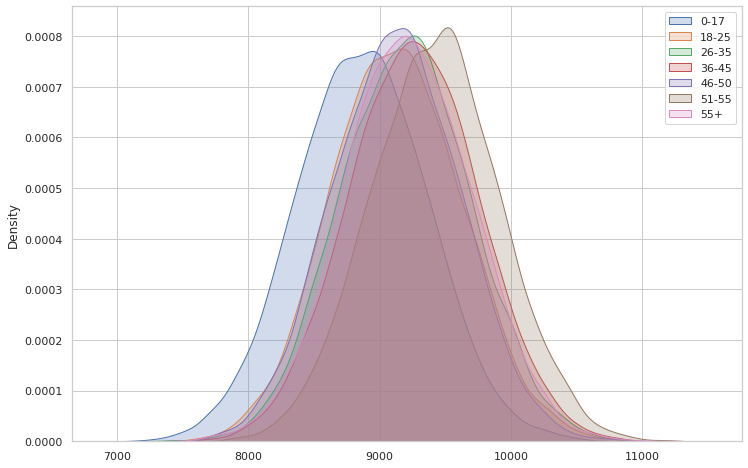

In [146]:
CLT_Age(100,10000)

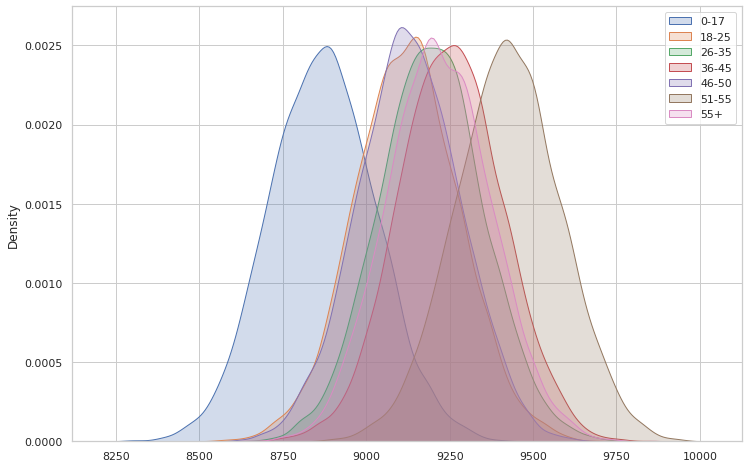

In [147]:
CLT_Age(1000,10000)

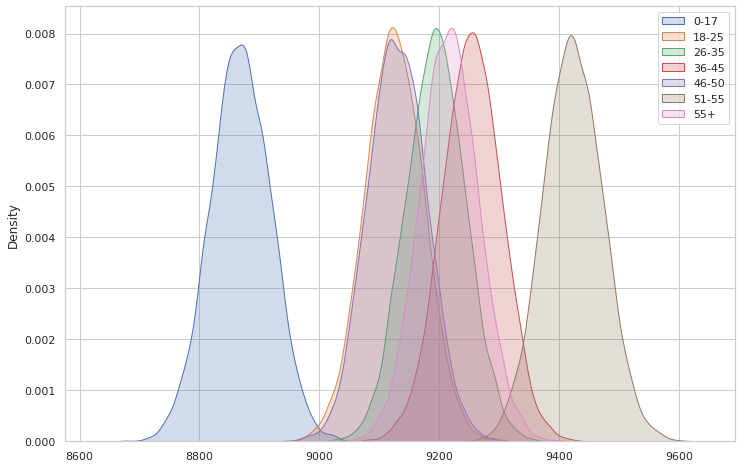

In [148]:
CLT_Age(10000,10000)

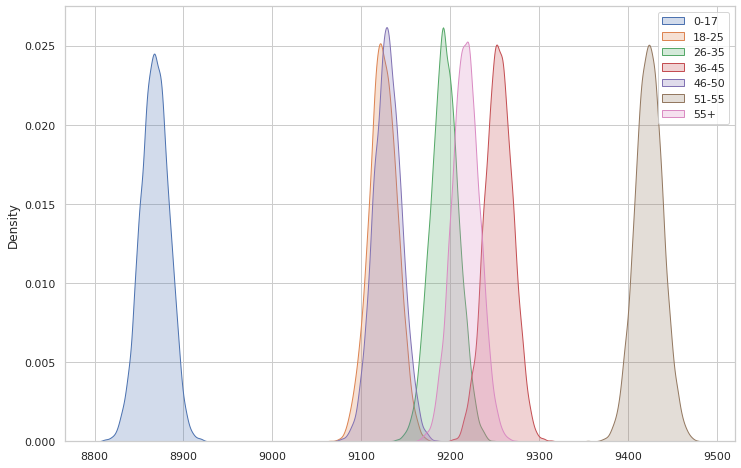

,Age,Confidence_L,Lower Limit,Upper Limit,diff,std_error
0,0-17,90%,8841.44,8893.01,51.57,15.674772
1,18-25,90%,9097.89,9149.88,51.99,15.802432
2,26-35,90%,9167.40,9219.30,51.90,15.775076
3,36-45,90%,9228.64,9280.42,51.78,15.738602
4,46-50,90%,9103.77,9155.03,51.26,15.580547
5,51-55,90%,9397.29,9448.94,51.65,15.699088
6,55+,90%,9191.38,9242.37,50.99,15.498480
7,0-17,95%,8836.16,8897.20,61.04,15.571429
8,18-25,95%,9092.64,9154.45,61.81,15.767857
9,26-35,95%,9162.56,9224.21,61.65,15.727041


In [149]:
CLT_Age(100000,10000)

### **Observations:** 
* As the sample size increases distinction between different age group is visible clearly.
* Age group 0-17 users having lowest mean of spending.
* Age group 51-55 users having highest mean of spending. 
* Other age groups are closely distributed as you can see there is significant overlapping.


###**Confidence Interval considering 50 million Males and Females (99% CL)**

In [150]:
# Confidence Interval considering 50 million Males and Females (99% CL)
m_m = round(np.mean(df_male['Purchase']),2)
m_std = round(np.std(df_male['Purchase']),2)
m_f = round(np.mean(df_female['Purchase']),2)
f_std = round(np.std(df_female['Purchase']),2)
pop = 50000000
pop_std_m = m_std/(pop**(1/2))
pop_std_f = f_std/(pop**(1/2))
# for 99% Confidence Interval male
Lower_Limit_m = m_m-2.575*pop_std_m
Upper_Limit_m = m_m+2.575*pop_std_m
# for 99% Confidence Interval Female
Lower_Limit_f = m_f-2.575*pop_std_f
Upper_Limit_f = m_f+2.575*pop_std_f
arr = [[Lower_Limit_m,Upper_Limit_m,pop_std_m],
 [Lower_Limit_f,Upper_Limit_f,pop_std_f]]
df = pd.DataFrame(data=arr, index = ['Male','Female'],
 columns=['Lower Limit','Upper Limit','std_error'])
df

,Lower Limit,Upper Limit,std_error
Male,9365.895839,9369.544161,0.708412
Female,8669.346081,8672.753919,0.661716


# **Business Insights:**
### **Based on EDA:**
1. Walmart Business Case Study dataset having 550068 rows and 10 columns.
2. Categorical Variable Age, Occupation and Stay In Current City Years are belongs to ordinal.
3. The total number of unique users are 5891 and unique products are 3631.
4. Mean of purchase is approximately 9264 amounts and most of user (75% of total users) purchase is below 12054 amounts.
5. 	Highley active user belongs to the Age bins of 26-35 years followed by Age bins of 36-45 and so on.
6. 71.72% of total user are male rest of the female i.e., 28.28%.
7. 58% of total users are unmarried and 42% are married.
8. More than 50% of the Users belongs to these 5 occupations (4,0,7,1 and 17 ).
9. More than 50% of the Users belongs to those cities which is under C Category.
10. Around 49% of the Users are new to the cities as they are residing for less than of 1 years.
11. Around 78% of contribution in total Purchase amount by Users, those belongs to age group between 18+year to 45 years.
12. Around 74 % of contribution in total Purchase amount by Users, those belongs to City Category of B and C. And alone city category A contributed 41% of contribution in total Purchase amount.
13. Approximate 59 % of contribution in total Purchase amount by Users are unmarried.
14. Around 49% of contribution in total Purchase amount by Users those are residing for less than of 1 years.
15. People living in a city for less than 1 year are spending more.
16.	75% of total purchase count belongs to male and rest to female.
17. Around 78% of total purchase count done by Users, those belongs to age group between 18+year to 45 years.
18. Approximate 59 % of total purchase count belongs to the unmarried users.









### **Based of Confidence Interval and CLT:**

1. As sample size increases, the standard deviation of the sample means becomes smaller.
2. As the sample size smaller, confidence intervals are overlapping for male and female users and as the sample size increases clear distinction in average spending for male and female users appear. 
3. It is also clear from graph the average spending of male is more than the female.
4. On the basis of marital status, there is no significant difference has been noticed in average spending between married and unmarried users.
5. As the sample size increases distinction between different age group is visible clearly.
6. Age group 0-17 users having lowest mean of spending.
7. Age group 51-55 users having highest mean of spending. 
8. Other age groups are closely distributed, as you can see there is significant overlapping.
9. For male users with population size of 50 million with 99% confidence level, the confidence interval is [9365.89, 9369.54].
10. For female users with population size of 50 million with 99% confidence level, the confidence interval is [8669.35, 8672.75].



### **Recommendations:**
1. As significant deviation has been noticed in between confidence interval of female and male, so Walmart may do some customization on product based on gender just to improve bussiness in female segment.
2. As there is no significant deviation has been noticed in between confidence interval of married and unmarried, still Walmart can offer some discount for married couples just to improve revenue contribution of female and married users segment. 
3. Walmart can add more product specifically for user age group of 0-17 years, their purchase contribution is very low amount-wise.
4. As the users time period of staying in city increases their contribution in purchase amount decreases.Therefore, Walmart can focus on customer relationship, Product variety and product life cycle in order to improve customer retainabilty.
5. For Walmart, there is a fair chance to improve purchase amount contribution by tier C city-category, which is having highest number users but second highest in puchase amount contribution. This could be done through by providing coupons and rebates. 
6. As users Age group of 51-55 users having highest mean of spending but their frequency of purchase is low, so give some discount on product for user age group above 50+. 
